# Proyecto: Análisis de Rendimiento de Campañas de Marketing

## Objetivos del Proyecto

- **Comprender y preprocesar el dataset**: Identificar y manejar valores faltantes, inconsistencias y outliers.
- **Realizar un análisis exploratorio de datos (EDA)**: Descubrir patrones y relaciones significativas entre las variables.
- **Visualizar datos**: Crear visualizaciones informativas utilizando Matplotlib, Seaborn y Plotly.
- **Extraer conclusiones**: Interpretar los resultados y proporcionar recomendaciones basadas en el análisis.

## 1. Preparacion del Entorno de Trabajo

In [39]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px 
import plotly.express as px 
import math as e
from matplotlib import ticker
import plotly.graph_objects as go
pd.options.display.float_format = '{:.2f}'.format


## 2. Carga de Datos

In [40]:
df = pd.read_csv(r'mcp_1.csv')

## 3. Inspeccion Inicial de los Datos

- Visualiza las primeras y últimas filas del DataFrame.
- Obtén información general del dataset.
- Identifica las columnas y su tipo de datos.

In [41]:
df.head(10)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment
0,CAM0001,Billboard,Fashion,Kuala Lumpur,484341.00,197038.00,545901.00,NaN,0.08,7993.00,0.34,849005.00,0.64,212.00,2/3/2023,23/12/2023,3.00,3.00,Medium
1,CAM0002,NaN,Health,Sarawak,468792.00,33743.00,527513.00,4130.00,0.95,9459.00,NaN,921078.00,3.78,29.00,NaN,NaN,3.00,7.00,Medium
2,CAM0003,Radio,Electronics,Penang,10487.00,6745.00,806911.00,12209.00,NaN,7168.00,0.05,51142.00,3.64,74.00,12/4/2023,20/10/2023,1.00,2.00,Medium
3,CAM0004,Email,Electronics,Penang,345431.00,329112.00,108570.00,34391.00,0.62,7190.00,0.36,191887.00,2.64,67.00,24/4/2023,26/1/2023,5.00,6.00,High
4,CAM0005,Radio,Fashion,Kuala Lumpur,322345.00,34365.00,799855.00,13056.00,NaN,1794.00,0.05,167241.00,1.02,40.00,10/1/2023,1/1/2023,5.00,6.00,Low
5,CAM0006,TV,Electronics,Penang,422726.00,NaN,25680.00,16342.00,0.77,9786.00,0.34,480187.00,1.81,174.00,16/8/2023,15/6/2023,5.00,3.00,Medium
6,NaN,Radio,Automotive,Sarawak,NaN,444126.00,81342.00,35053.00,0.03,290.00,0.56,753564.00,2.69,105.00,21/6/2023,7/7/2023,4.00,7.00,High
7,CAM0008,Billboard,Groceries,NaN,406954.00,64007.00,180250.00,17104.00,0.74,8704.00,0.93,987174.00,0.39,59.00,13/6/2023,19/10/2023,4.00,44.46,Low
8,CAM0009,NaN,Electronics,Johor,NaN,71027.00,543474.00,3181.00,0.54,20614.53,NaN,318098.00,1.50,358.00,21/6/2023,5/12/2023,3.00,10.00,High
9,CAM0010,Radio,Automotive,NaN,399568.00,297974.00,319054.00,36693.00,0.16,3160.00,0.78,823506.00,2.32,272.00,22/5/2023,5/11/2023,NaN,9.00,Medium


- La CTR es la cantidad de clics que su anuncio recibe dividida entre la cantidad de veces que este se muestra.

- CR Se expresa en porcentaje y mide la relación de usuarios que han realizado una acción entre todas las visitas.

- Rendimiento de la inversión (ROI) que el departamento de marketing utiliza para medir la capacidad que tienen las campañas de marketing de generar ingresos para el negocio. 

In [42]:
df.columns

Index(['Campaign_ID', 'Channel', 'Product_Category', 'Region', 'Budget',
       'Spend', 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue',
       'ROI', 'Duration', 'Start_Date', 'End_Date', 'Customer_Satisfaction',
       'Campaign_Effectiveness', 'Market_Segment'],
      dtype='object')

In [43]:
df.shape # saber las dimensiones

(5000, 19)

In [44]:
df.dtypes # saber los tipos de datos

Campaign_ID                object
Channel                    object
Product_Category           object
Region                     object
Budget                    float64
Spend                     float64
Impressions               float64
Clicks                    float64
CTR                       float64
Conversions               float64
CR                        float64
Revenue                   float64
ROI                       float64
Duration                  float64
Start_Date                 object
End_Date                   object
Customer_Satisfaction     float64
Campaign_Effectiveness    float64
Market_Segment             object
dtype: object

In [45]:
df.describe()

,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Customer_Satisfaction,Campaign_Effectiveness
count,4500.00,4501.00,4496.00,4514.00,4502.00,4506.00,4504.00,4491.00,4505.00,4521.00,4508.00,4510.00
mean,319676.56,275463.72,605086.50,27467.00,0.59,5591.89,0.56,596220.81,2.82,200.59,3.49,6.42
std,751117.59,398575.68,1643209.00,23203.54,0.80,5629.01,0.58,783483.56,2.77,173.40,4.18,7.77
min,10014.00,1.00,1593.00,104.00,0.00,13.00,0.00,0.00,0.00,1.00,1.00,1.00
25%,137987.25,111368.00,262427.75,12713.75,0.25,2604.25,0.26,257458.50,1.27,94.00,2.00,3.00
50%,265945.00,229281.00,508967.50,26232.00,0.50,5076.50,0.51,509334.00,2.61,188.00,3.00,6.00
75%,385589.50,344592.00,766329.50,38618.25,0.76,7578.00,0.76,771731.00,3.83,278.00,4.00,8.00
max,41756100.00,4317430.00,99916600.00,250409.02,9.57,67712.57,7.37,9717200.00,29.53,1911.83,46.06,88.91


In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 19 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Campaign_ID             4741 non-null   object 
 1   Channel                 4746 non-null   object 
 2   Product_Category        4733 non-null   object 
 3   Region                  4739 non-null   object 
 4   Budget                  4500 non-null   float64
 5   Spend                   4501 non-null   float64
 6   Impressions             4496 non-null   float64
 7   Clicks                  4514 non-null   float64
 8   CTR                     4502 non-null   float64
 9   Conversions             4506 non-null   float64
 10  CR                      4504 non-null   float64
 11  Revenue                 4491 non-null   float64
 12  ROI                     4505 non-null   float64
 13  Duration                4521 non-null   float64
 14  Start_Date              4741 non-null   

In [47]:
df.describe(include=['O']) # Como se comportan las variables categoricas 

,Campaign_ID,Channel,Product_Category,Region,Start_Date,End_Date,Market_Segment
count,4741,4746,4733,4739,4741,4743,4738
unique,4741,6,5,6,366,366,3
top,CAM5000,Billboard,Electronics,Kuala Lumpur,21/7/2023,7/7/2023,High
freq,1,990,978,988,24,23,1601


## 4. Limpieza de Datos.

### 4.1 Manejo de Valores Faltantes
 - Identifica las columnas con valores faltantes
 - Decide como manejar los valores faltantes:
   - Eliminar filas o columnas con muchos valores faltantes
   - Imputar valores utilizando métodos como media, mediana o moda.

In [48]:
df.isnull().sum() # saber valores nulos

Campaign_ID               259
Channel                   254
Product_Category          267
Region                    261
Budget                    500
Spend                     499
Impressions               504
Clicks                    486
CTR                       498
Conversions               494
CR                        496
Revenue                   509
ROI                       495
Duration                  479
Start_Date                259
End_Date                  257
Customer_Satisfaction     492
Campaign_Effectiveness    490
Market_Segment            262
dtype: int64

In [49]:
df.duplicated().sum() # saber los valores duplicados

np.int64(0)

In [50]:
# Calcula el porcentaje de valores nulos por columna
porcentaje_nulos = df.isnull().mean() * 100

porcentaje_nulos

Campaign_ID               5.18
Channel                   5.08
Product_Category          5.34
Region                    5.22
Budget                   10.00
Spend                     9.98
Impressions              10.08
Clicks                    9.72
CTR                       9.96
Conversions               9.88
CR                        9.92
Revenue                  10.18
ROI                       9.90
Duration                  9.58
Start_Date                5.18
End_Date                  5.14
Customer_Satisfaction     9.84
Campaign_Effectiveness    9.80
Market_Segment            5.24
dtype: float64

In [51]:
# Ver que filas tienen mas de dos valores nulos y ordenarlos por orden descendente
df['nulos'] = df.isnull().sum(axis=1)
df[df.isnull().sum(axis=1) > 3].sort_values(by='nulos', ascending=False)

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment,nulos
2321,CAM2322,Email,Electronics,Kuala Lumpur,NaN,327421.00,388527.00,25525.00,0.04,NaN,NaN,NaN,0.27,NaN,30/11/2023,12/2/2023,NaN,8.00,NaN,7
2694,NaN,Radio,Health,Kuala Lumpur,44684.00,199437.00,748551.00,NaN,NaN,2727.00,NaN,449316.00,3.30,274.00,29/4/2023,NaN,NaN,8.00,NaN,7
1669,CAM1670,NaN,Health,NaN,NaN,26555.00,489575.00,2123.00,0.08,NaN,0.18,NaN,NaN,167.00,16/11/2023,8/6/2023,NaN,4.00,Low,7
1250,CAM1251,Billboard,NaN,Kuala Lumpur,NaN,NaN,NaN,17262.00,0.04,1238.00,0.30,319863.00,NaN,NaN,21/10/2023,3/7/2023,4.00,NaN,High,7
982,CAM0983,Radio,Electronics,Kuala Lumpur,NaN,NaN,392754.00,1407.00,0.34,NaN,0.39,371389.00,0.09,NaN,NaN,17/7/2023,NaN,3.00,Medium,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30,CAM0031,Billboard,NaN,Sarawak,327702.00,232860.00,121327.00,NaN,0.26,5361.00,0.80,209976.00,NaN,270.00,22/3/2023,NaN,1.00,6.00,High,4
29,CAM0030,Radio,Electronics,Penang,NaN,26219.00,223573.00,31793.00,0.95,9957.00,0.64,204500.00,4.68,185.00,NaN,26/2/2023,NaN,NaN,High,4
4961,NaN,Billboard,NaN,Penang,197191.00,367155.00,NaN,NaN,0.27,836.00,0.02,357588.00,0.14,130.00,13/12/2023,19/9/2023,3.00,8.00,Low,4
4991,CAM4992,Social Media,Electronics,Kuala Lumpur,427457.00,NaN,NaN,19437.00,0.07,NaN,0.12,702779.00,0.19,357.00,20/7/2023,21/9/2023,NaN,1.00,High,4


In [52]:
#Eliminar las campañas que tengan mas de tres valores nulos en sus filas
df = df[df.isnull().sum(axis=1) <= 3]

## Manejo de valores nulos en las columnas restantes.

- **Campaign_ID**: Cambiar el numero de campaña desde el 1 hasta 4490
- **Channel**: Cambiar por el termino 'Unknown'
- **Product_Category**: Cambiar por el termino 'Unknown'
- **Region**: Cambiar por el termino 'Unknown'
- **Budget**: Calculo de la Media, de acuerdo a su región.
- **Spend**: Calculo de la Media, de acuerdo a su región.
- **Impressions**: Aplicar Media, Mediana y Moda mediante una funcion. 
- **Clicks**: Aplicar Media, Mediana y Moda mediante una funcion. 
- **CTR**: Aplicar Media, Mediana y Moda mediante una funcion. 
- **Conversions**: Aplicar Media, Mediana y Moda mediante una funcion. 
- **CR**: Aplicar Media, Mediana y Moda mediante una funcion. 
- **Revenue**: Aplicar Media, Mediana y Moda mediante una funcion. 
- **ROI**: Aplicar Media, Mediana y Moda mediante una funcion. 
- **Duration**: Mediana : ya que las campañas son muy cortas o muy largas
- **Start_Date**: Cambiar por el termino 'Unknown'
- **End_Date**: Cambiar por el termino 'Unknown'
- **Customer_Satisfaction**: Cambiar por el termino 'no_rating'
- **Campaign_Effectiveness**: Cambiar por el termino 'no_rating'
- **Market_Segment**: Aplicar Media, Mediana y Moda mediante una funcion. 

In [53]:
# Reemplazar los valores de la columna Campaign_ID por un valor consecutivo del 1 al final de la lista
df['Campaign_ID'] = range(1, len(df) + 1)

In [54]:
# Reemplazar los valores nulos de las columnas por 'Unknown'
df['Channel'] = df['Channel'].fillna('Unknown')
df['Product_Category'] = df['Product_Category'].fillna('Unknown')
df['Region'] = df['Region'].fillna('Unknown')
df['Start_Date'] = df['Start_Date'].fillna('Unknown')
df['End_Date'] = df['End_Date'].fillna('Unknown')
df['Duration'] = df['Duration'].fillna('Unknown')
df['Customer_Satisfaction'] = df['Customer_Satisfaction'].fillna('0')
df['Campaign_Effectiveness'] = df['Campaign_Effectiveness'].fillna('0')

In [55]:
df.head()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment,nulos
0,1,Billboard,Fashion,Kuala Lumpur,484341.00,197038.00,545901.00,NaN,0.08,7993.00,0.34,849005.00,0.64,212.00,2/3/2023,23/12/2023,3.00,3.00,Medium,1
2,2,Radio,Electronics,Penang,10487.00,6745.00,806911.00,12209.00,NaN,7168.00,0.05,51142.00,3.64,74.00,12/4/2023,20/10/2023,1.00,2.00,Medium,1
3,3,Email,Electronics,Penang,345431.00,329112.00,108570.00,34391.00,0.62,7190.00,0.36,191887.00,2.64,67.00,24/4/2023,26/1/2023,5.00,6.00,High,0
4,4,Radio,Fashion,Kuala Lumpur,322345.00,34365.00,799855.00,13056.00,NaN,1794.00,0.05,167241.00,1.02,40.00,10/1/2023,1/1/2023,5.00,6.00,Low,1
5,5,TV,Electronics,Penang,422726.00,NaN,25680.00,16342.00,0.77,9786.00,0.34,480187.00,1.81,174.00,16/8/2023,15/6/2023,5.00,3.00,Medium,1


In [56]:
# Aplicar la Media a las columnas 'Budget' y 'Spend' de acuerdo a la media por 'Region', para reemplazar los valores nulos de estas columnas, máximo 3 dígitos decimales
df['Budget'] = df['Budget'].fillna(df.groupby('Region')['Budget'].transform('mean'))
df['Spend'] = df['Spend'].fillna(df.groupby('Region')['Spend'].transform('mean'))

In [57]:
from scipy import stats
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import root_mean_squared_error
from sklearn.impute import KNNImputer

<Axes: >

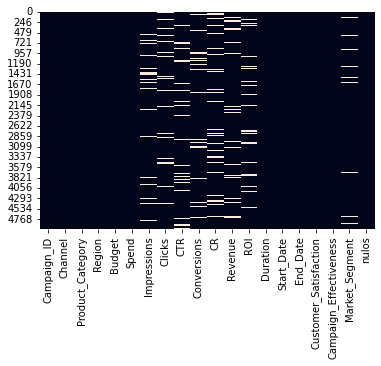

In [58]:
sns.heatmap(df.isnull(), cbar=False)

In [59]:
df.dtypes

Campaign_ID                 int64
Channel                    object
Product_Category           object
Region                     object
Budget                    float64
Spend                     float64
Impressions               float64
Clicks                    float64
CTR                       float64
Conversions               float64
CR                        float64
Revenue                   float64
ROI                       float64
Duration                   object
Start_Date                 object
End_Date                   object
Customer_Satisfaction      object
Campaign_Effectiveness     object
Market_Segment             object
nulos                       int64
dtype: object

In [60]:
# usar la media, mediana y moda en las columnas 'Impressions', 'Clicks', 'CTR', 'Conversions', 'CR', 'Revenue', 'ROI', 'Market_Segment' y 'Duration' para reemplazar los valores nulos
df['Impressions'] = df['Impressions'].fillna(df['Impressions'].mean())
df['Clicks'] = df['Clicks'].fillna(df['Clicks'].mean())
df['CTR'] = df['CTR'].fillna(df['CTR'].mean())
df['Conversions'] = df['Conversions'].fillna(df['Conversions'].mean())
df['CR'] = df['CR'].fillna(df['CR'].mean())
df['Revenue'] = df['Revenue'].fillna(df['Revenue'].mean())
df['ROI'] = df['ROI'].fillna(df['ROI'].mean())
df['Market_Segment'] = df['Market_Segment'].fillna(df['Market_Segment'].mode()[0])

In [61]:
df.isnull().sum()

Campaign_ID               0
Channel                   0
Product_Category          0
Region                    0
Budget                    0
Spend                     0
Impressions               0
Clicks                    0
CTR                       0
Conversions               0
CR                        0
Revenue                   0
ROI                       0
Duration                  0
Start_Date                0
End_Date                  0
Customer_Satisfaction     0
Campaign_Effectiveness    0
Market_Segment            0
nulos                     0
dtype: int64

In [62]:
df.head()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment,nulos
0,1,Billboard,Fashion,Kuala Lumpur,484341.00,197038.00,545901.00,27497.63,0.08,7993.00,0.34,849005.00,0.64,212.00,2/3/2023,23/12/2023,3.00,3.00,Medium,1
2,2,Radio,Electronics,Penang,10487.00,6745.00,806911.00,12209.00,0.59,7168.00,0.05,51142.00,3.64,74.00,12/4/2023,20/10/2023,1.00,2.00,Medium,1
3,3,Email,Electronics,Penang,345431.00,329112.00,108570.00,34391.00,0.62,7190.00,0.36,191887.00,2.64,67.00,24/4/2023,26/1/2023,5.00,6.00,High,0
4,4,Radio,Fashion,Kuala Lumpur,322345.00,34365.00,799855.00,13056.00,0.59,1794.00,0.05,167241.00,1.02,40.00,10/1/2023,1/1/2023,5.00,6.00,Low,1
5,5,TV,Electronics,Penang,422726.00,285067.81,25680.00,16342.00,0.77,9786.00,0.34,480187.00,1.81,174.00,16/8/2023,15/6/2023,5.00,3.00,Medium,1


## Manejo de Outliers
- Utiliza gráficos de caja (boxplots) para identificar outliers en variables numéricas.
- Decide cómo manejar los outliers:
  - **Mantenerlos** si son relevantes.
  - **Eliminarlos** si son errores.
  - **Transformarlos** utilizando métodos como logaritmos.

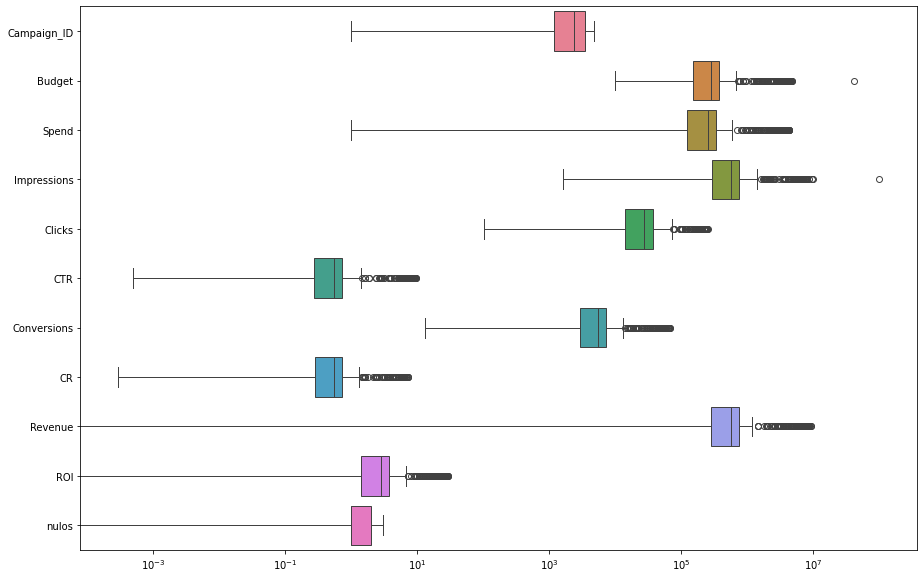

In [63]:
# Outliers = valores atípicos que podrian afectar el análisis
# Gráfica de caja para identificar outliers 
plt.figure(figsize=(15,10))
sns.boxplot(data=df, vert=False, orient='h')

# ajustar el eje x para que se vea mejor la gráfica
plt.xscale('log')
plt.show()

## Metodo IQR para la eliminacion/transformacion de los outliers.

In [ ]:
# Calcula Q1 (25%) y Q3 (75%)
Q1 = df['CTR'].quantile(0.25)
Q3 = df['CTR'].quantile(0.75)

# Calcula IQR
IQR = Q3 - Q1

# Determina los limites mas altos y bajos para los outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Transformar los outliers
outliers = df[(df['CTR'] < lower_bound) | (df['CTR'] > upper_bound)].round(2)
non_outliers = df[(df['CTR'] >= lower_bound) & (df['CTR'] <= upper_bound)].round(2)

# Muestra los outliers y los no outliers
print("Outliers based on IQR method:")
print(outliers)

print("\nNon-Outliers based on IQR method:")
print(non_outliers)

# Calcula el porcentaje de outliers
outliers_percent = (len(outliers) / df.shape[0]) * 100
print(f"Percentage of outliers: {outliers_percent:.2f}%")

Outliers based on IQR method:
      Campaign_ID       Channel Product_Category        Region    Budget  \
164           152            TV      Electronics  Kuala Lumpur 419998.00   
206           189            TV      Electronics        Penang 192566.00   
309           286  Social Media           Health        Penang 396034.00   
357           332       Unknown      Electronics       Sarawak  63921.00   
577           540            TV          Fashion       Sarawak  78905.00   
...           ...           ...              ...           ...       ...   
4773         4486     Billboard      Electronics  Kuala Lumpur 145936.00   
4846         4555     Billboard           Health  Kuala Lumpur 440708.00   
4853         4561            TV       Automotive         Sabah  36956.00   
4949         4651  Social Media          Fashion       Sarawak  84086.00   
4963         4664  Social Media          Fashion  Kuala Lumpur 319310.00   

         Spend  Impressions    Clicks  CTR  Conversions  

In [65]:
# Detectar outliers con el metodo IQR (Rango intercuartil) solo en columnas numéricas
numeric_cols = df.select_dtypes(include=[np.number]).columns
Q1 = df[numeric_cols].quantile(0.25)
Q3 = df[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
outliers = ((df[numeric_cols] < (Q1 - 1.5 * IQR)) | (df[numeric_cols] > (Q3 + 1.5 * IQR))).sum()
outliers

Campaign_ID     0
Budget         94
Spend          92
Impressions    83
Clicks         59
CTR            73
Conversions    74
CR             62
Revenue        79
ROI            79
nulos           0
dtype: int64

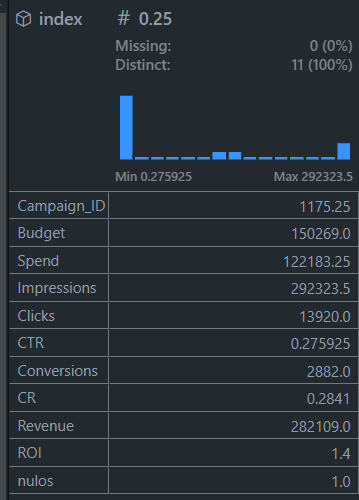

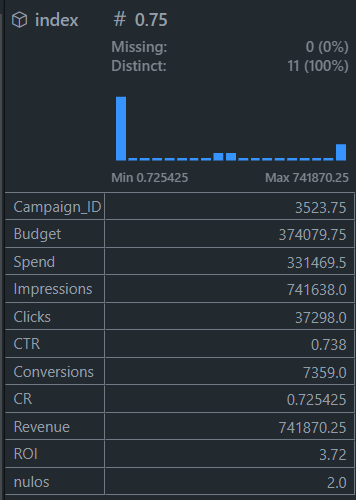

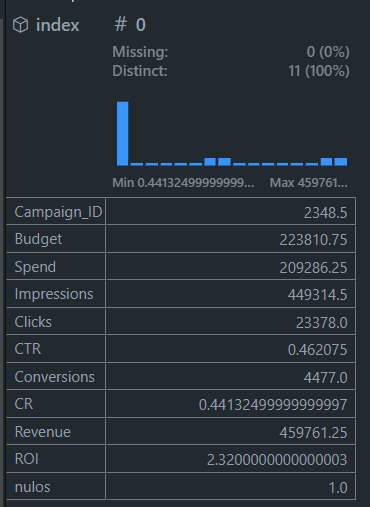

In [66]:
# Realizar una copia del DataFrame
df_copy = df.copy()

In [67]:
df.head()

,Campaign_ID,Channel,Product_Category,Region,Budget,Spend,Impressions,Clicks,CTR,Conversions,CR,Revenue,ROI,Duration,Start_Date,End_Date,Customer_Satisfaction,Campaign_Effectiveness,Market_Segment,nulos
0,1,Billboard,Fashion,Kuala Lumpur,484341.00,197038.00,545901.00,27497.63,0.08,7993.00,0.34,849005.00,0.64,212.00,2/3/2023,23/12/2023,3.00,3.00,Medium,1
2,2,Radio,Electronics,Penang,10487.00,6745.00,806911.00,12209.00,0.59,7168.00,0.05,51142.00,3.64,74.00,12/4/2023,20/10/2023,1.00,2.00,Medium,1
3,3,Email,Electronics,Penang,345431.00,329112.00,108570.00,34391.00,0.62,7190.00,0.36,191887.00,2.64,67.00,24/4/2023,26/1/2023,5.00,6.00,High,0
4,4,Radio,Fashion,Kuala Lumpur,322345.00,34365.00,799855.00,13056.00,0.59,1794.00,0.05,167241.00,1.02,40.00,10/1/2023,1/1/2023,5.00,6.00,Low,1
5,5,TV,Electronics,Penang,422726.00,285067.81,25680.00,16342.00,0.77,9786.00,0.34,480187.00,1.81,174.00,16/8/2023,15/6/2023,5.00,3.00,Medium,1


In [68]:
# transformar las columnas 'Impressions', 'Revenue', 'Budget', 'Spend' y 'ROI' a escala logarítmica y guardarlos en df_copy
df_copy['log_Impressions'] = np.log1p(df_copy['Impressions'])
df_copy['log_Revenue'] = np.log1p(df_copy['Revenue'])
df_copy['log_Budget'] = np.log1p(df_copy['Budget'])
df_copy['log_Spend'] = np.log1p(df_copy['Spend'])
df_copy['log_ROI'] = np.log1p(df_copy['ROI'])

### Correción de Inconsistencias 

- Verificar y corregir inconsistencias en datos categóricos.

In [69]:
# Cuales son las columnas con datos categoricos
df.select_dtypes(include=['object']).columns

# Corregir las incosistencias de las columnas con datos categoricos
df['Channel'] = df['Channel'].str.lower()
df['Product_Category'] = df['Product_Category'].str.lower()
df['Region'] = df['Region'].str.lower()
df['Market_Segment'] = df['Market_Segment'].str.lower()

## 5. Análisis Exploratorio de Datos (EDA)

### 5.1 Análisis Univariado

- Analiza la distribución de variables numéricas.
  - Crea histogramas y gráficos KDE.
- Analiza la frecuencia de variables categóricas.
  - Crea gráficos de barras.

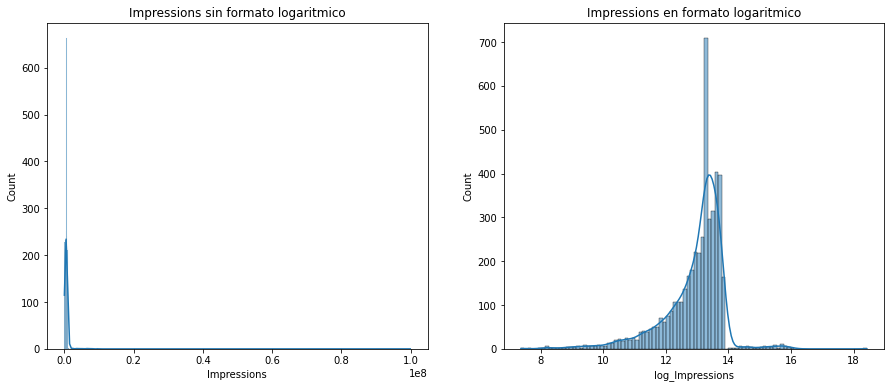

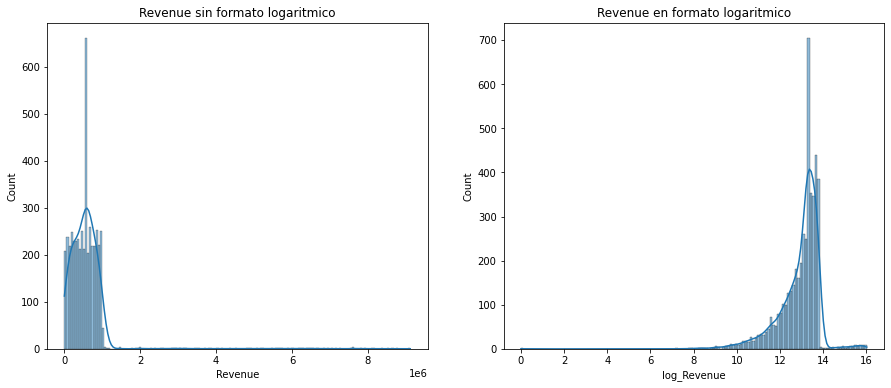

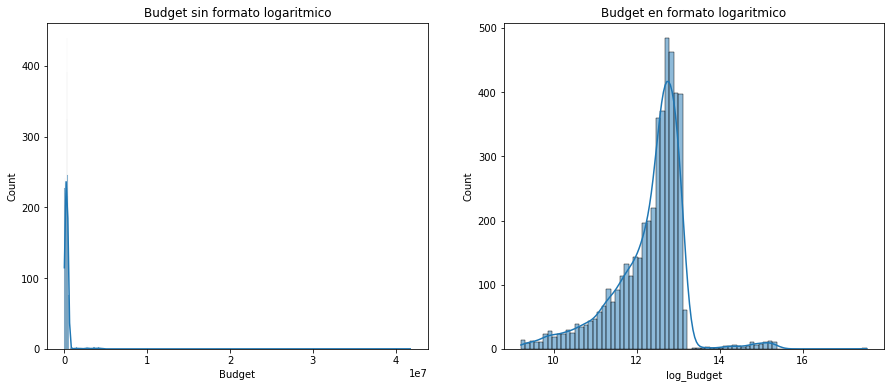

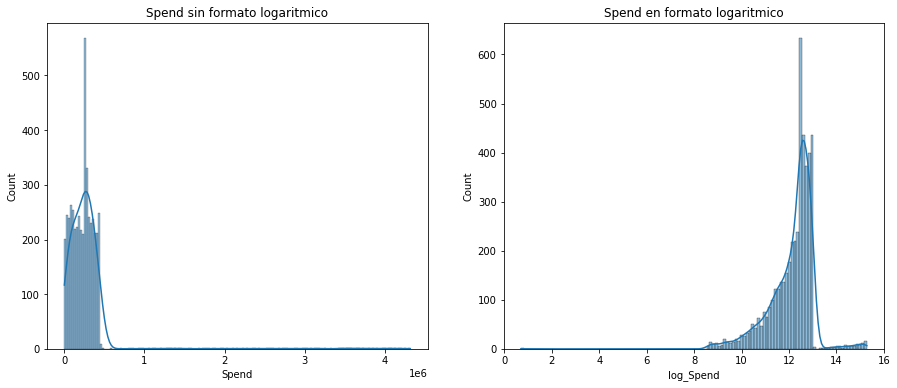

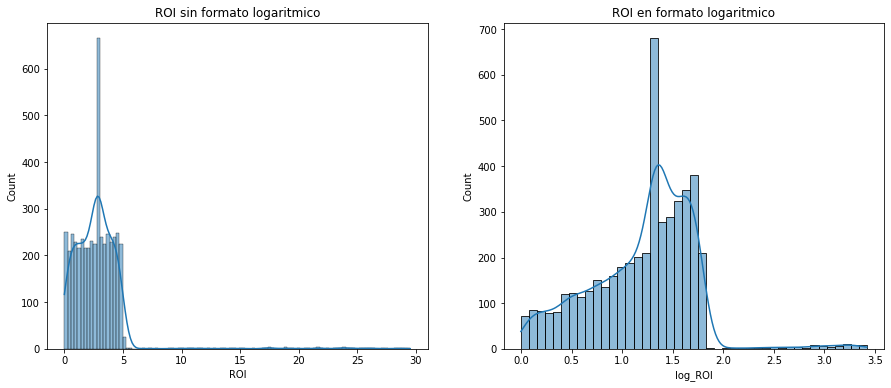

In [70]:
# Visualizar la distribución de las columnas con outliers y sin outliers
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Impressions'], kde=True)
plt.title('Impressions sin formato logaritmico')

plt.subplot(1, 2, 2)
sns.histplot(df_copy['log_Impressions'], kde=True)
plt.title('Impressions en formato logaritmico')
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Revenue'], kde=True)
plt.title('Revenue sin formato logaritmico')

plt.subplot(1, 2, 2)
sns.histplot(df_copy['log_Revenue'], kde=True)
plt.title('Revenue en formato logaritmico')
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Budget'], kde=True)
plt.title('Budget sin formato logaritmico')

plt.subplot(1, 2, 2)
sns.histplot(df_copy['log_Budget'], kde=True)
plt.title('Budget en formato logaritmico')
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['Spend'], kde=True)
plt.title('Spend sin formato logaritmico')

plt.subplot(1, 2, 2)
sns.histplot(df_copy['log_Spend'], kde=True)
plt.title('Spend en formato logaritmico')
plt.show()

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
sns.histplot(df['ROI'], kde=True)
plt.title('ROI sin formato logaritmico')

plt.subplot(1, 2, 2)
sns.histplot(df_copy['log_ROI'], kde=True)
plt.title('ROI en formato logaritmico')
plt.show()

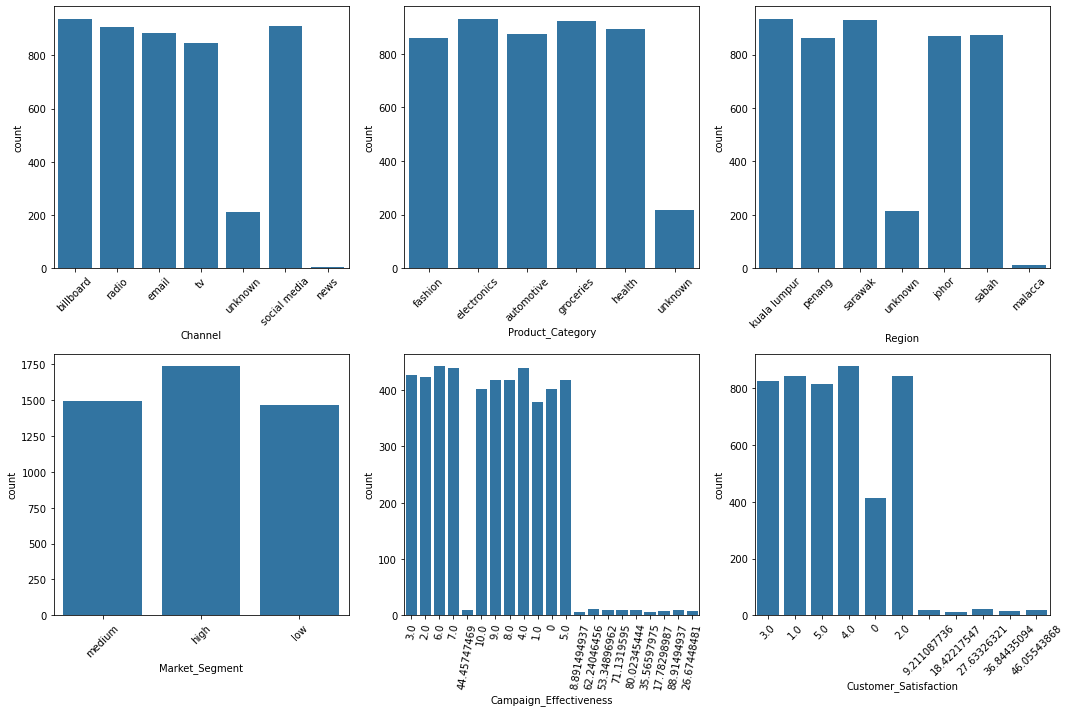

In [71]:
# Analizar la frecuencia de las variables categoricas con graficos de barras
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='Channel')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.countplot(data=df, x='Product_Category')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.countplot(data=df, x='Region')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.countplot(data=df, x='Market_Segment')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.countplot(data=df, x='Campaign_Effectiveness')
plt.xticks(rotation=80)

plt.subplot(2, 3, 6)
sns.countplot(data=df, x='Customer_Satisfaction')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

<ipython-input-179-abbca6ba0f18>:8: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`

<ipython-input-179-abbca6ba0f18>:9: FutureWarning:

Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



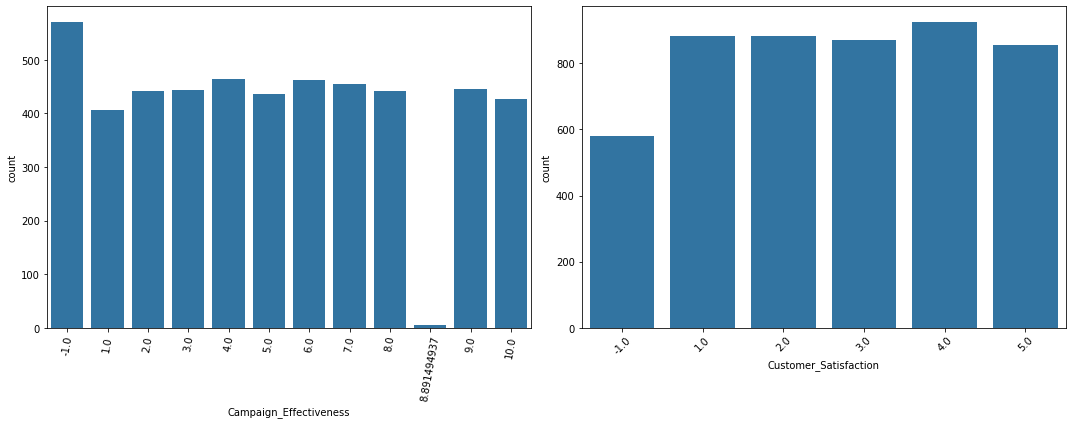

In [179]:
# Organizar los datos de las columnas 'Campaign_efectiveness' mediante una funcion en la que descarte los valores que sean mayores a 10 y menores a 0
df['Campaign_Effectiveness'] = df['Campaign_Effectiveness'].apply(lambda x: x if (x != 'Unknown' and 0 <= float(x) <= 10) else 'Unknown')

# Organizar los datos de las columnas 'Customer_Satisfaction' mediante una funcion en la que descarte los valores que sean mayores a 5 y menores a 0
df['Customer_Satisfaction'] = df['Customer_Satisfaction'].apply(lambda x: x if (x != 'Unknown' and 0 <= float(x) <= 5) else 'Unknown')

# Reemplazar 'Unknown' temporalmente con un valor numérico para ordenar
df['Campaign_Effectiveness'] = df['Campaign_Effectiveness'].replace('Unknown', -1).astype(float)
df['Customer_Satisfaction'] = df['Customer_Satisfaction'].replace('Unknown', -1).astype(float)

# Visualizar la distribución de las columnas 'Campaign_Effectiveness' y 'Customer_Satisfaction' con gráficos de barras
plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
# ordenar los valores de la columna 'Campaign_Effectiveness' de forma ascendente
df['Campaign_Effectiveness'] = df['Campaign_Effectiveness'].sort_values(ascending=True)
sns.countplot(data=df, x='Campaign_Effectiveness')
plt.xticks(rotation=80)

plt.subplot(1, 2, 2)
# ordenar los valores de la columna 'Customer_Satisfaction' de forma ascendente
df['Customer_Satisfaction'] = df['Customer_Satisfaction'].sort_values(ascending=True)
sns.countplot(data=df, x='Customer_Satisfaction')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Revertir el reemplazo temporal de 'Unknown'
df['Campaign_Effectiveness'] = df['Campaign_Effectiveness'].replace(-1, 'Unknown')
df['Customer_Satisfaction'] = df['Customer_Satisfaction'].replace(-1, 'Unknown')


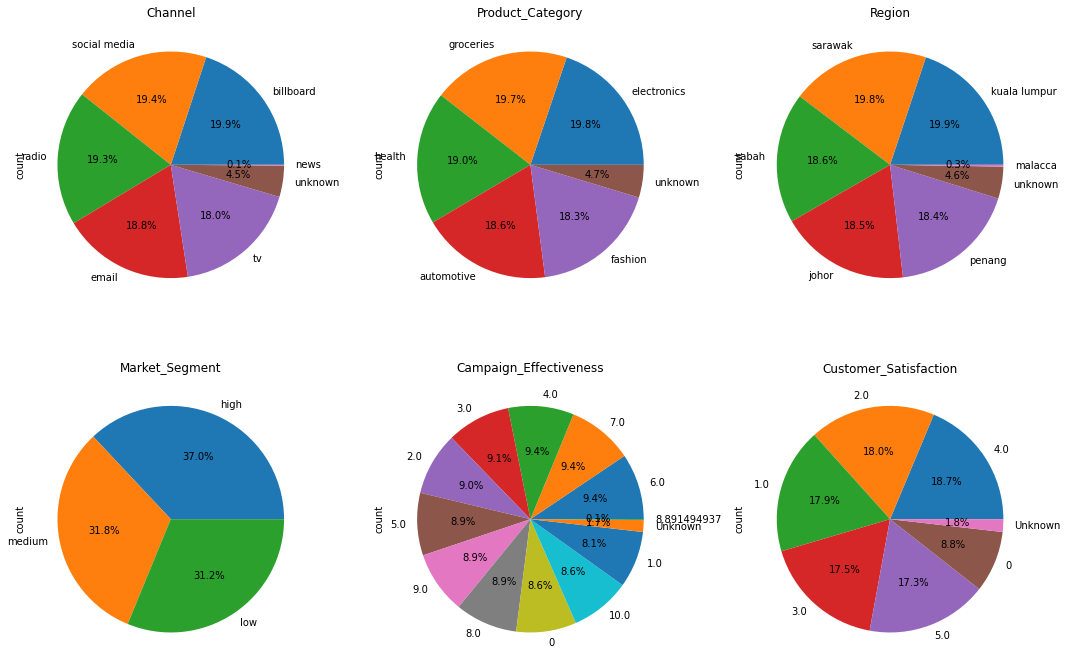

In [73]:
# Mostrar la frecuencia de las variables categoricas con graficos de pastel 
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
df['Channel'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Channel')

plt.subplot(2, 3, 2)
df['Product_Category'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Product_Category')

plt.subplot(2, 3, 3)
df['Region'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Region')

plt.subplot(2, 3, 4)
df['Market_Segment'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Market_Segment')

plt.subplot(2, 3, 5)
df['Campaign_Effectiveness'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Campaign_Effectiveness') 

plt.subplot(2, 3, 6)
df['Customer_Satisfaction'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Customer_Satisfaction')

plt.tight_layout()
plt.show()

### 5.2 Análisis Bivariado

- Explora relaciones entre dos variables:
  - **Numérica vs Numérica**: Gráficos de dispersión, calcular correlaciones.
  - **Categórica vs Numérica**: Gráficos de cajas, gráficos de violín.
  - **Categórica vs Categórica**: Tablas de contingencia, heatmaps.

### Análisis Bivariado - Númerica vs Númerica 

In [175]:
# Calcular la correlacion entre las variables numericas
correlation = num_df.corr()
correlation


,Impressions,Budget,Spend,Revenue,ROI
Impressions,1.00,0.12,0.04,0.10,-0.01
Budget,0.12,1.00,0.19,0.17,0.00
Spend,0.04,0.19,1.00,0.08,-0.00
Revenue,0.10,0.17,0.08,1.00,-0.02
ROI,-0.01,0.00,-0.00,-0.02,1.00


<Figure size 1080x720 with 0 Axes>

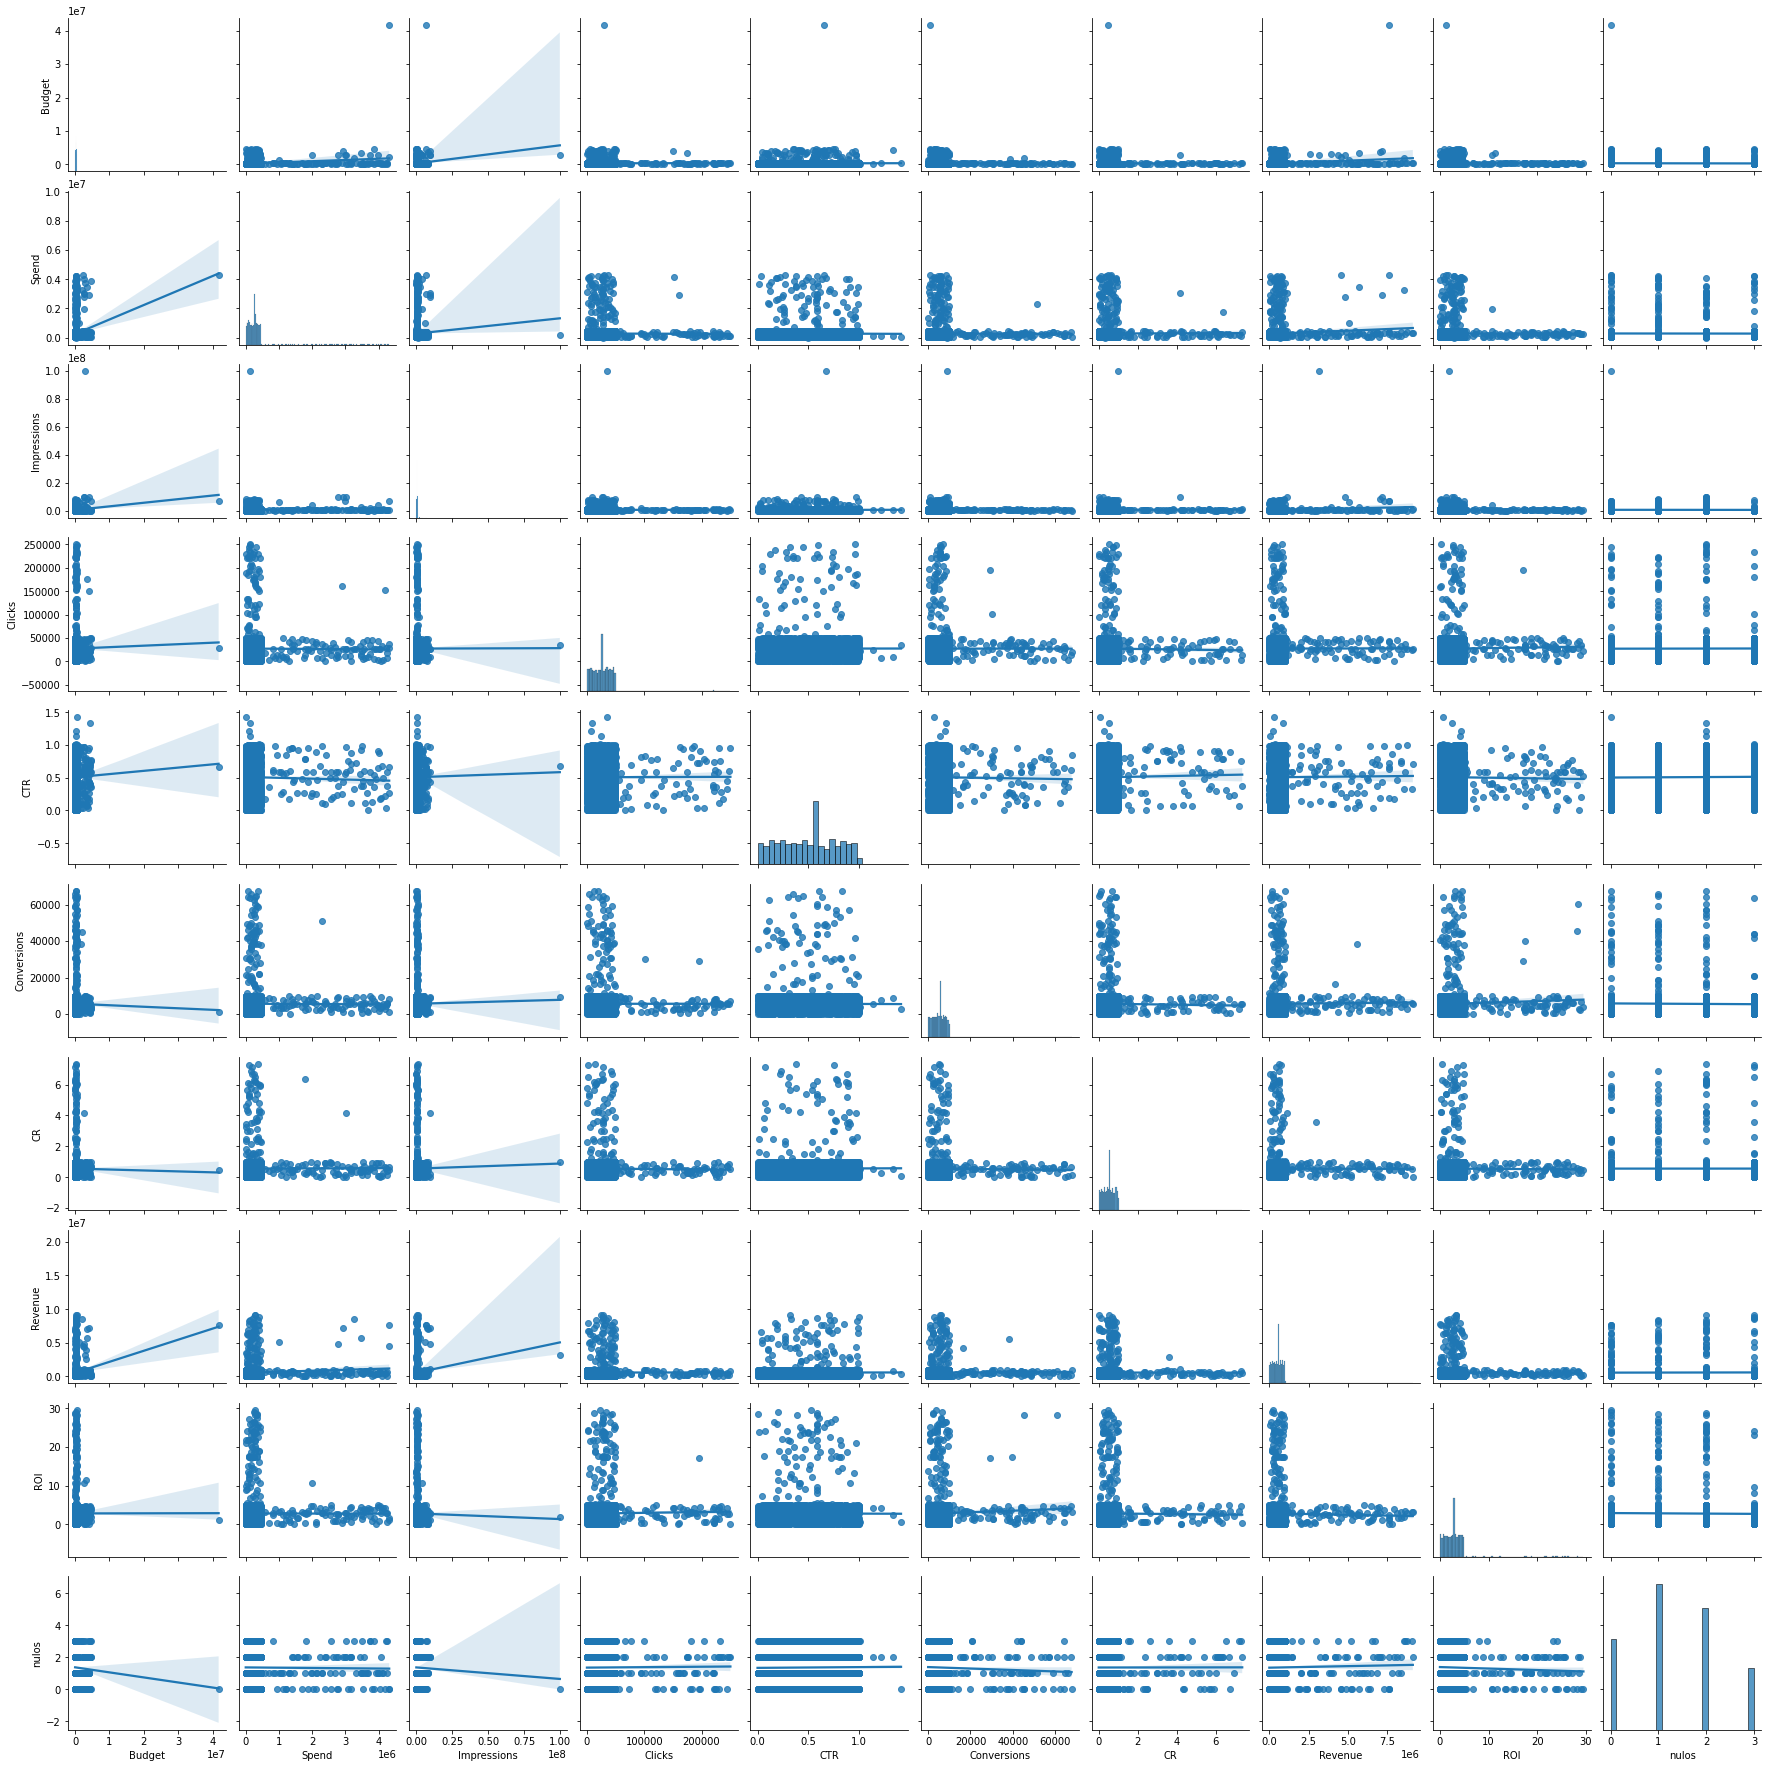

In [ ]:
# Grafico de dispersion para analizar la relacion entre las variables numericas y calcular la correlacion, exceptuando la columna 'Campaign_ID'
plt.figure(figsize=(15, 10))
numeric_df = non_outliers.select_dtypes(include=[np.number]).drop('Campaign_ID', axis=1)

# Agregar lineas de tendencia y regresion
sns.pairplot(numeric_df, kind='reg')

plt.show()

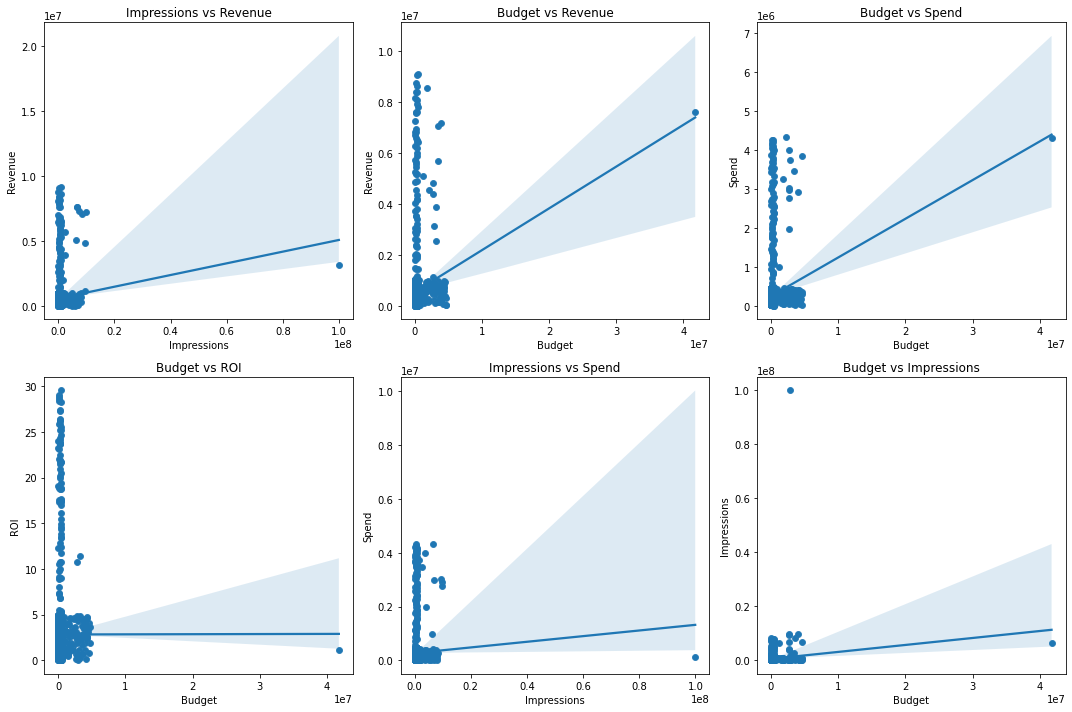

In [ ]:
# Grafico de dispersion entre las columnas númericas con los outliers
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(data=non_outliers, x='Impressions', y='Revenue')
sns.regplot(data=non_outliers, x='Impressions', y='Revenue')
plt.title('Impressions vs Revenue')

plt.subplot(2, 3, 2)
sns.scatterplot(data=non_outliers, x='Budget', y='Revenue')
sns.regplot(data=non_outliers, x='Budget', y='Revenue')
plt.title('Budget vs Revenue')

plt.subplot(2, 3, 3)
sns.scatterplot(data=non_outliers, x='Budget', y='Spend')
sns.regplot(data=non_outliers, x='Budget', y='Spend')
plt.title('Budget vs Spend')

plt.subplot(2, 3, 4)
sns.scatterplot(data=non_outliers, x='Budget', y='ROI')
sns.regplot(data=non_outliers, x='Budget', y='ROI')
plt.title('Budget vs ROI')

plt.subplot(2, 3, 5)
sns.scatterplot(data=non_outliers, x='Impressions', y='Spend')
sns.regplot(data=non_outliers, x='Impressions', y='Spend')
plt.title('Impressions vs Spend')

plt.subplot(2, 3, 6)
sns.scatterplot(data=non_outliers, x='Budget', y='Impressions')
sns.regplot(data=non_outliers, x='Budget', y='Impressions')
plt.title('Budget vs Impressions')


plt.tight_layout()
plt.show()

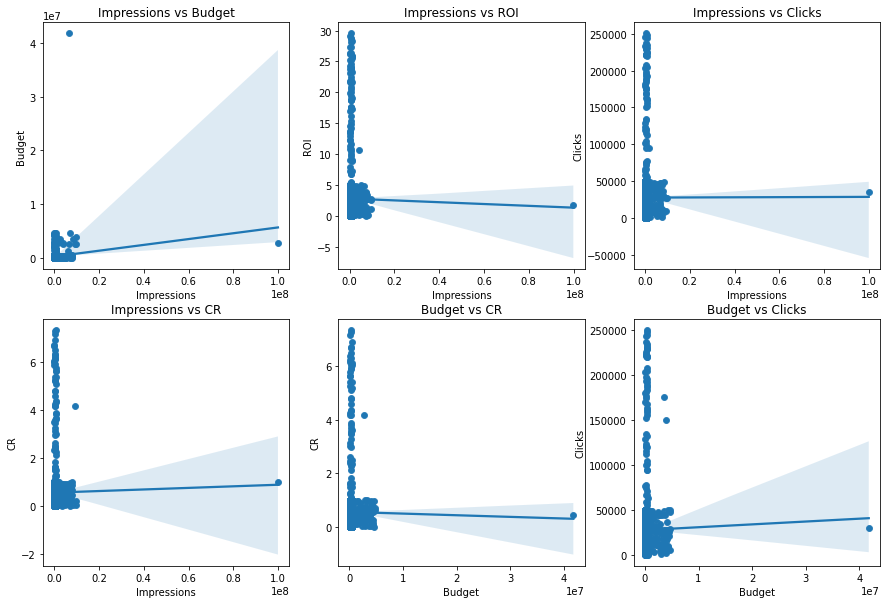

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(data=non_outliers, x='Impressions', y='Budget')
sns.regplot(data=non_outliers, x='Impressions', y='Budget')
plt.title('Impressions vs Budget')

plt.subplot(2, 3, 2)
sns.scatterplot(data=non_outliers, x='Impressions', y='ROI')
sns.regplot(data=non_outliers, x='Impressions', y='ROI')
plt.title('Impressions vs ROI')

plt.subplot(2, 3, 3)
sns.scatterplot(data=non_outliers, x='Impressions', y='Clicks')
sns.regplot(data=non_outliers, x='Impressions', y='Clicks')
plt.title('Impressions vs Clicks')

plt.subplot(2, 3, 4)
sns.scatterplot(data=non_outliers, x='Impressions', y='CR')
sns.regplot(data=non_outliers, x='Impressions', y='CR')
plt.title('Impressions vs CR')

plt.subplot(2, 3, 5)
sns.scatterplot(data=non_outliers, x='Budget', y='CR')
sns.regplot(data=non_outliers, x='Budget', y='CR')
plt.title('Budget vs CR')

plt.subplot(2, 3, 6)
sns.scatterplot(data=non_outliers, x='Budget', y='Clicks')
sns.regplot(data=non_outliers, x='Budget', y='Clicks')
plt.title('Budget vs Clicks')

plt.tight_layout
plt.show()

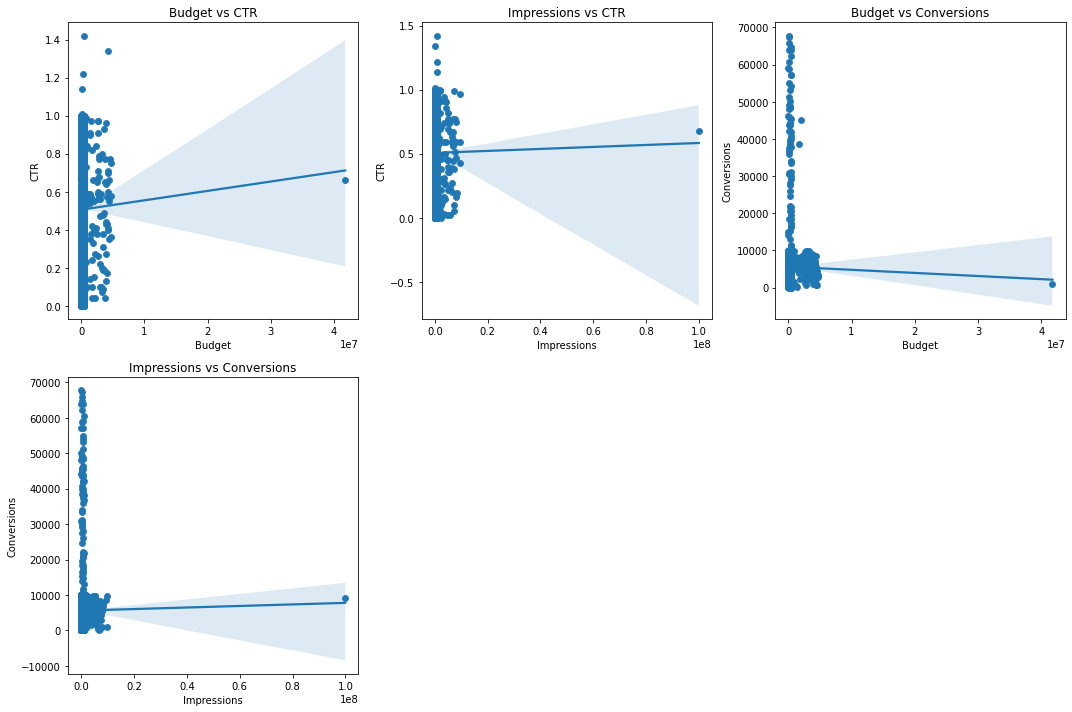

In [ ]:
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(data=non_outliers, x='Budget', y='CTR')
sns.regplot(data=non_outliers, x='Budget', y='CTR')
plt.title('Budget vs CTR')  

plt.subplot(2, 3, 2)
sns.scatterplot(data=non_outliers, x='Impressions', y='CTR')
sns.regplot(data=non_outliers, x='Impressions', y='CTR')
plt.title('Impressions vs CTR')

plt.subplot(2, 3, 3)
sns.scatterplot(data=non_outliers, x='Budget', y='Conversions')
sns.regplot(data=non_outliers, x='Budget', y='Conversions')
plt.title('Budget vs Conversions')

plt.subplot(2, 3, 4)
sns.scatterplot(data=non_outliers, x='Impressions', y='Conversions')
sns.regplot(data=non_outliers, x='Impressions', y='Conversions')
plt.title('Impressions vs Conversions')

plt.tight_layout()
plt.show()

### Análisis Bivariado - Categórica vs Numérica

In [ ]:
#Cambiar el formato de la columna 'Camapign_ID' a categorico
df['Campaign_ID'] = df['Campaign_ID'].astype('str')


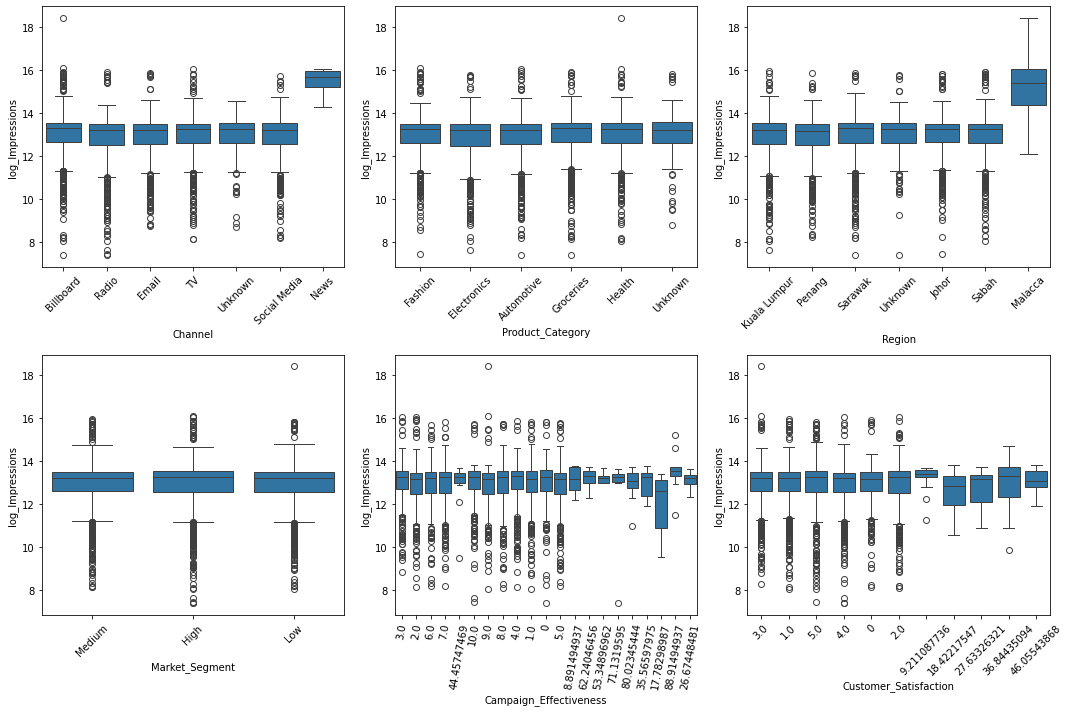

In [ ]:
# Graficos de caja para analizar una variable numerica con la categoria log_Impressions
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.boxplot(data=df_copy, x='Channel', y='log_Impressions')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.boxplot(data=df_copy, x='Product_Category', y='log_Impressions')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.boxplot(data=df_copy, x='Region', y='log_Impressions')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.boxplot(data=df_copy, x='Market_Segment', y='log_Impressions')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.boxplot(data=df_copy, x='Campaign_Effectiveness', y='log_Impressions')
plt.xticks(rotation=80)

plt.subplot(2, 3, 6)
sns.boxplot(data=df_copy, x='Customer_Satisfaction', y='log_Impressions')
plt.xticks(rotation=45)
 
plt.tight_layout()
plt.show()

In [ ]:
#Reemplazar los valores de la columna Campaign_Effectiveness por '0' si son mayores a 10 o menores a 0
df_copy['Campaign_Effectiveness'] = df_copy['Campaign_Effectiveness'].apply(lambda x: x if (x == 'Unknown' or 0 <= float(x) <= 10) else 'Unknown')

#Reemplazar los valores de la columna Customer_Satisfaction por '0' si son mayores a 5 o menores a 0
df_copy['Customer_Satisfaction'] = df_copy['Customer_Satisfaction'].apply(lambda x: x if (x == 'Unknown' or 0 <= float(x) <= 5) else 'Unknown')

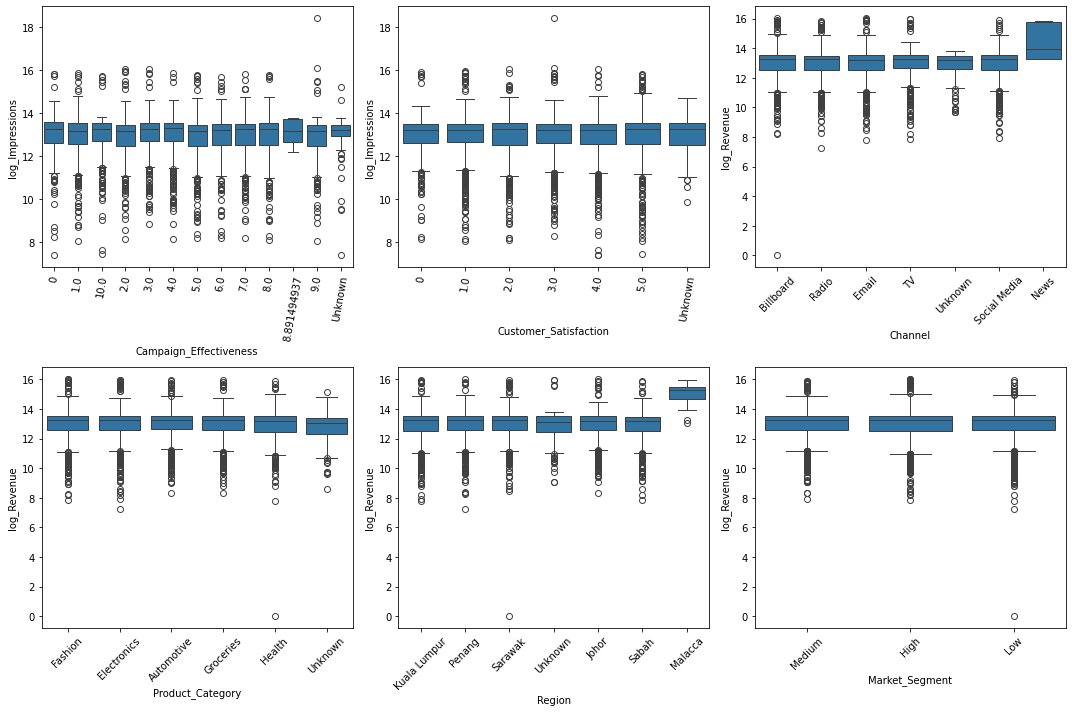

In [ ]:
# Graficos de caja para analizar una variable numerica con la categoria, Log_Impressions y Log_Revenue
plt.figure(figsize=(15, 10))

# Convertir todos los valores de 'Campaign_Effectiveness' a string y ordenar
campaign_effectiveness_order = sorted(df_copy['Campaign_Effectiveness'].astype(str).unique())

plt.subplot(2, 3, 1)
sns.boxplot(data=df_copy, x='Campaign_Effectiveness', y='log_Impressions', order=campaign_effectiveness_order)
plt.xticks(rotation=80)

# Convertir todos los valores de 'Customer_Satisfaction' a string y ordenar
customer_satisfaction_order = sorted(df_copy['Customer_Satisfaction'].astype(str).unique())

plt.subplot(2, 3, 2)
sns.boxplot(data=df_copy, x='Customer_Satisfaction', y='log_Impressions', order=customer_satisfaction_order)
plt.xticks(rotation=80)

plt.subplot(2, 3, 3)
sns.boxplot(data=df_copy, x='Channel', y='log_Revenue')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.boxplot(data=df_copy, x='Product_Category', y='log_Revenue')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
sns.boxplot(data=df_copy, x='Region', y='log_Revenue')
plt.xticks(rotation=45)

plt.subplot(2, 3, 6)
sns.boxplot(data=df_copy, x='Market_Segment', y='log_Revenue')
plt.xticks(rotation=45)


plt.tight_layout()
plt.show()

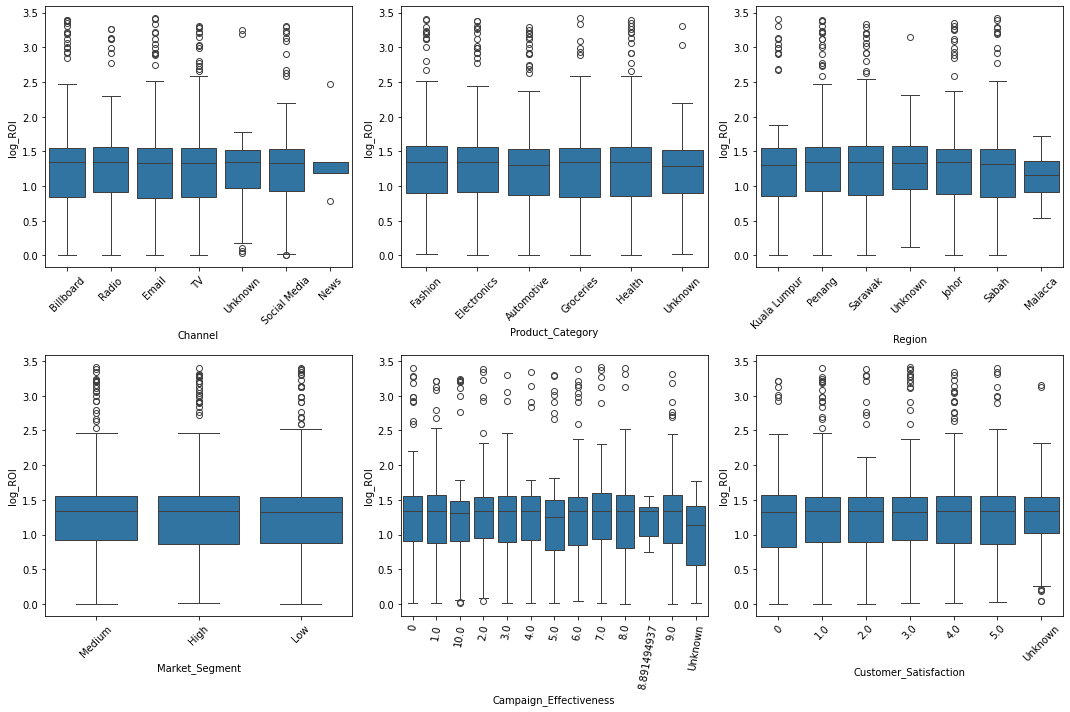

In [ ]:
# Graficos de caja para analizar una variable numerica con la categoria Log_ROI

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.boxplot(data=df_copy, x='Channel', y='log_ROI')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.boxplot(data=df_copy, x='Product_Category', y='log_ROI')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.boxplot(data=df_copy, x='Region', y='log_ROI')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.boxplot(data=df_copy, x='Market_Segment', y='log_ROI')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
campaign_effectiveness_order = sorted(df_copy['Campaign_Effectiveness'].astype(str).unique())
sns.boxplot(data=df_copy, x='Campaign_Effectiveness', y='log_ROI', order=campaign_effectiveness_order)
plt.xticks(rotation=80)

plt.subplot(2, 3, 6)
sns.boxplot(data=df_copy, x='Customer_Satisfaction', y='log_ROI', order=customer_satisfaction_order)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


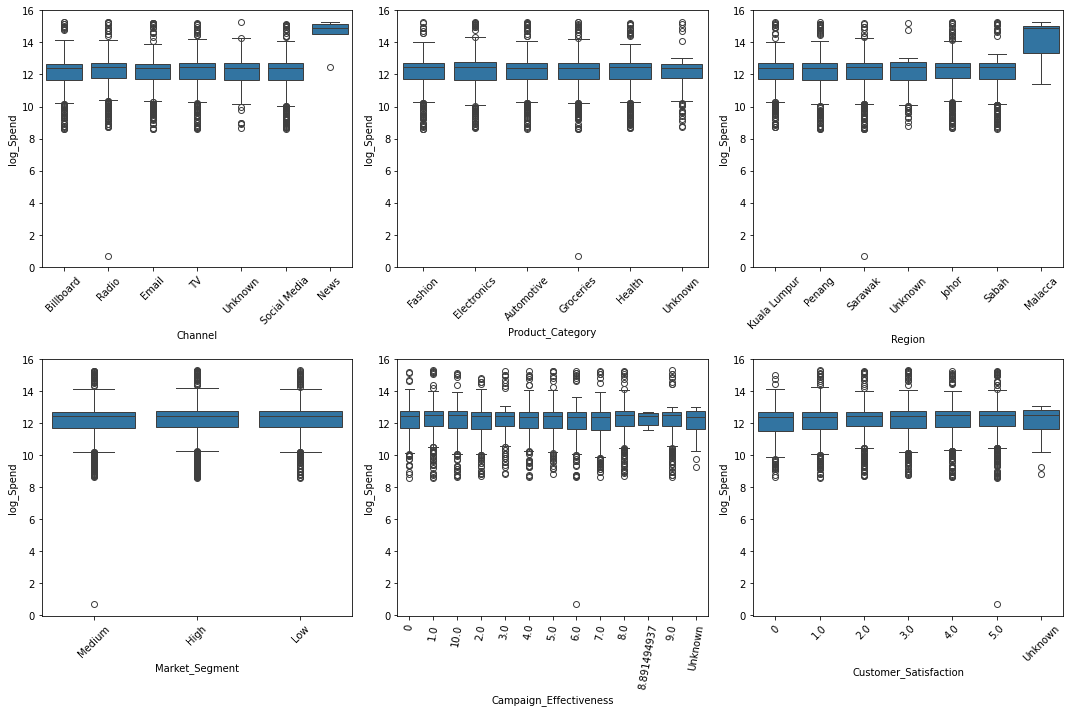

In [ ]:
# Graficos de caja para analizar una variable numerica con la categoria Log_Spend

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.boxplot(data=df_copy, x='Channel', y='log_Spend')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.boxplot(data=df_copy, x='Product_Category', y='log_Spend')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.boxplot(data=df_copy, x='Region', y='log_Spend')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.boxplot(data=df_copy, x='Market_Segment', y='log_Spend')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
campaign_effectiveness_order = sorted(df_copy['Campaign_Effectiveness'].astype(str).unique())
sns.boxplot(data=df_copy, x='Campaign_Effectiveness', y='log_Spend', order=campaign_effectiveness_order)
plt.xticks(rotation=80)

plt.subplot(2, 3, 6)
sns.boxplot(data=df_copy, x='Customer_Satisfaction', y='log_Spend', order=customer_satisfaction_order)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

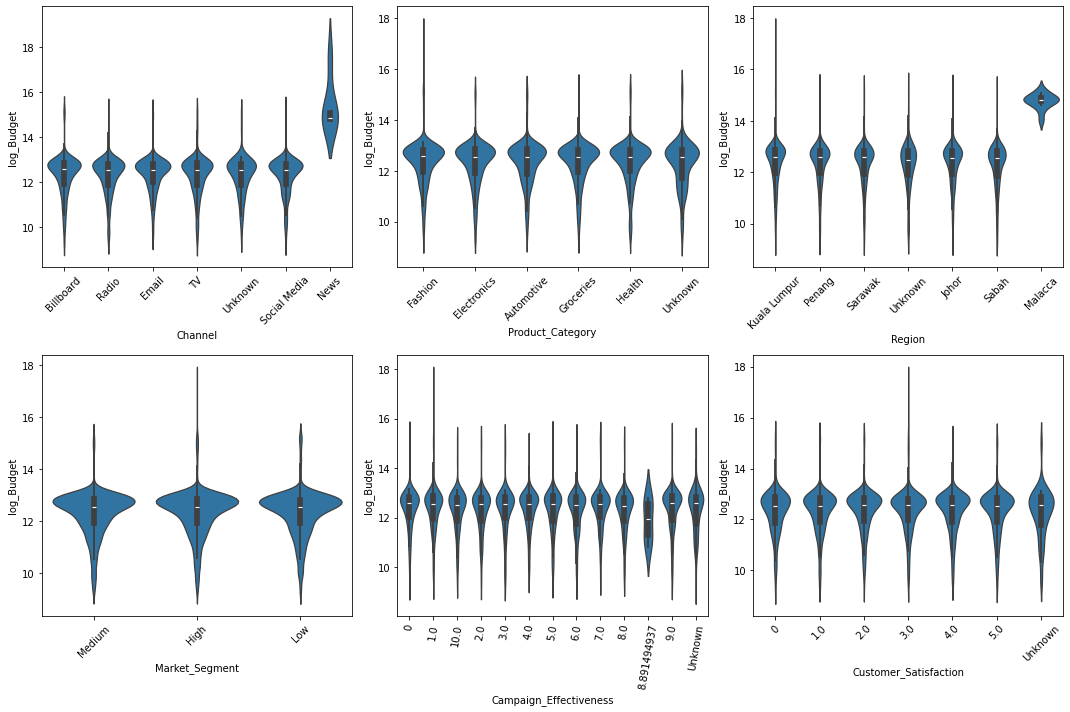

In [ ]:
# Grafica de violines para analizar una variable numerica con la categoria Log_Budget

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.violinplot(data=df_copy, x='Channel', y='log_Budget')
plt.xticks(rotation=45)

plt.subplot(2, 3, 2)
sns.violinplot(data=df_copy, x='Product_Category', y='log_Budget')
plt.xticks(rotation=45)

plt.subplot(2, 3, 3)
sns.violinplot(data=df_copy, x='Region', y='log_Budget')
plt.xticks(rotation=45)

plt.subplot(2, 3, 4)
sns.violinplot(data=df_copy, x='Market_Segment', y='log_Budget')
plt.xticks(rotation=45)

plt.subplot(2, 3, 5)
campaign_effectiveness_order = sorted(df_copy['Campaign_Effectiveness'].astype(str).unique())
sns.violinplot(data=df_copy, x='Campaign_Effectiveness', y='log_Budget', order=campaign_effectiveness_order)
plt.xticks(rotation=80)

plt.subplot(2, 3, 6)
sns.violinplot(data=df_copy, x='Customer_Satisfaction', y='log_Budget', order=customer_satisfaction_order)
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

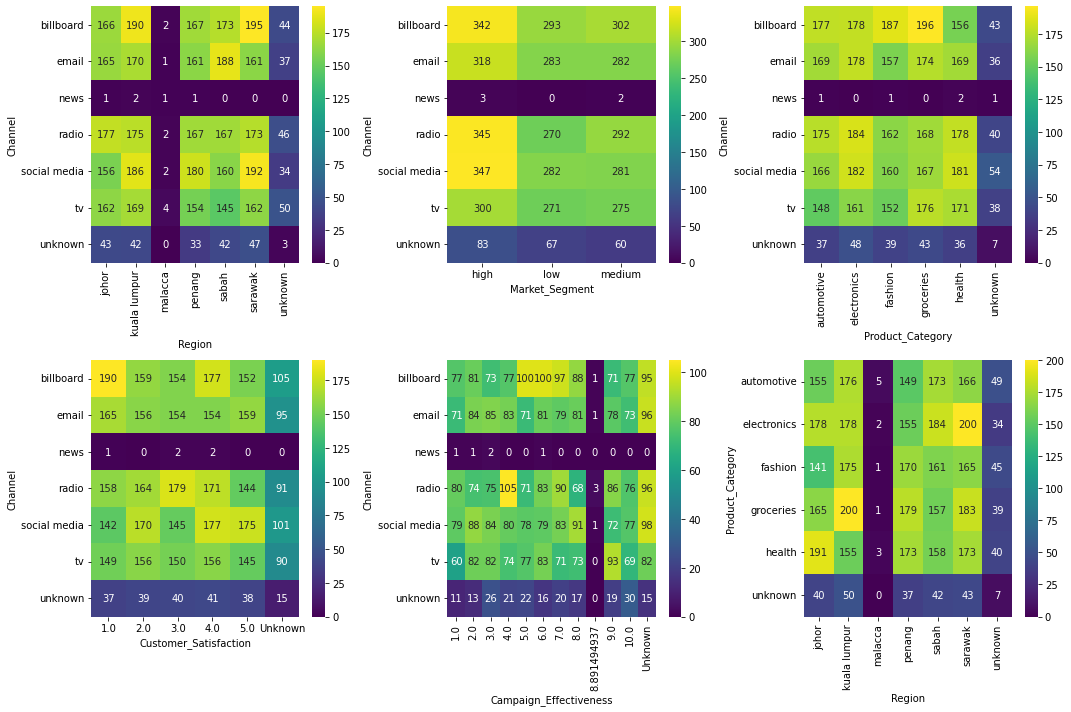

In [ ]:
#Tablas de contingencia para analizar la relacion entre dos variables categoricas
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
channel_region = pd.crosstab(df['Channel'], df['Region'])
sns.heatmap(channel_region, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 2)
channel_market_segment = pd.crosstab(df['Channel'], df['Market_Segment'])
sns.heatmap(channel_market_segment, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 3)
channel_product_category = pd.crosstab(df['Channel'], df['Product_Category'])
sns.heatmap(channel_product_category, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 4)
channel_customer_satisfaction = pd.crosstab(df['Channel'], df['Customer_Satisfaction'])
sns.heatmap(channel_customer_satisfaction, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 5)
channel_campaign_effectiveness = pd.crosstab(df['Channel'], df['Campaign_Effectiveness'])
sns.heatmap(channel_campaign_effectiveness, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 6)
product_category_region = pd.crosstab(df['Product_Category'], df['Region'])
sns.heatmap(product_category_region, annot=True, fmt='d', cmap='viridis')

plt.tight_layout()
plt.show()

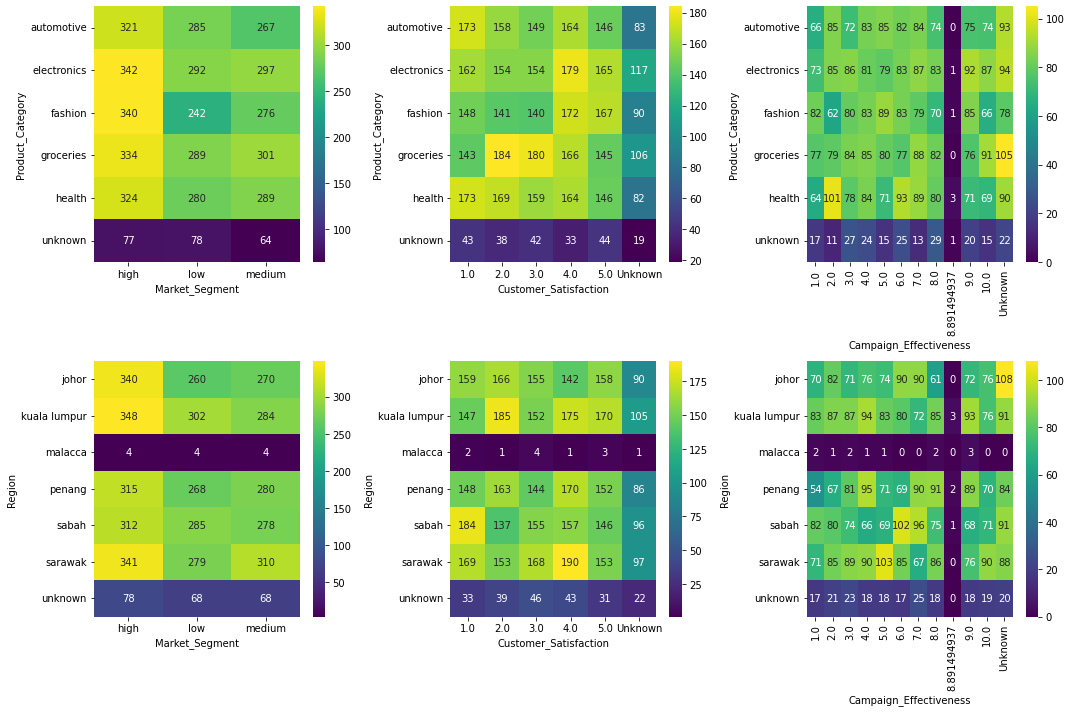

In [ ]:
#Tablas de contingencia para analizar la relacion entre dos variables categoricas
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
product_category_market_segment = pd.crosstab(df['Product_Category'], df['Market_Segment'])
sns.heatmap(product_category_market_segment, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 2)
product_category_customer_satisfaction = pd.crosstab(df['Product_Category'], df['Customer_Satisfaction'])
sns.heatmap(product_category_customer_satisfaction, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 3)
product_category_campaign_effectiveness = pd.crosstab(df['Product_Category'], df['Campaign_Effectiveness'])
sns.heatmap(product_category_campaign_effectiveness, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 4)
region_market_segment = pd.crosstab(df['Region'], df['Market_Segment'])
sns.heatmap(region_market_segment, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 5)
region_customer_satisfaction = pd.crosstab(df['Region'], df['Customer_Satisfaction'])
sns.heatmap(region_customer_satisfaction, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 6)
region_campaign_effectiveness = pd.crosstab(df['Region'], df['Campaign_Effectiveness'])
sns.heatmap(region_campaign_effectiveness, annot=True, fmt='d', cmap='viridis')

plt.tight_layout()
plt.show()

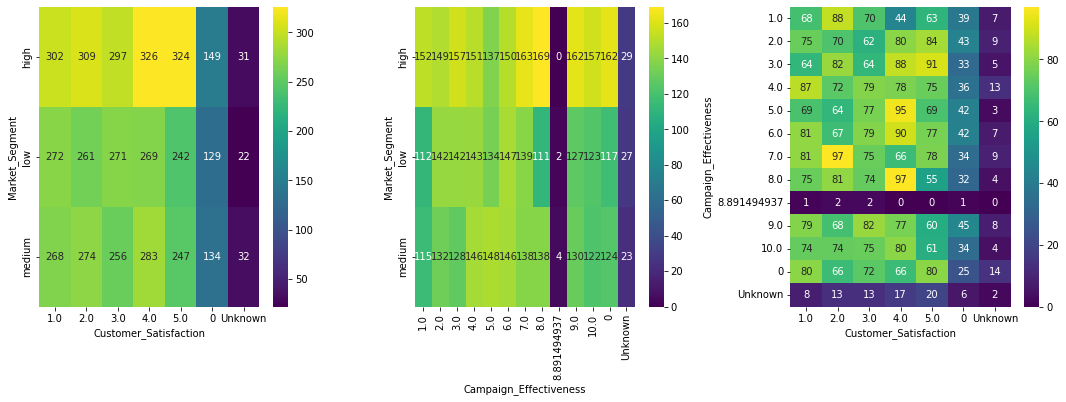

In [75]:
#Tablas de contingencia para analizar la relacion entre dos variables categoricas
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
market_segment_customer_satisfaction = pd.crosstab(df['Market_Segment'], df['Customer_Satisfaction'])
sns.heatmap(market_segment_customer_satisfaction, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 2)
market_segment_campaign_effectiveness = pd.crosstab(df['Market_Segment'], df['Campaign_Effectiveness'])
sns.heatmap(market_segment_campaign_effectiveness, annot=True, fmt='d', cmap='viridis')

plt.subplot(2, 3, 3)
campaign_effectiveness_customer_satisfaction = pd.crosstab(df['Campaign_Effectiveness'], df['Customer_Satisfaction'])
sns.heatmap(campaign_effectiveness_customer_satisfaction, annot=True, fmt='d', cmap='viridis')

plt.tight_layout()
plt.show()

### 5.3 Análisis Multivariado

- Crea matrices de correlación para variables numéricas.
- Realiza análisis de clusters o segmentación si es relevante.

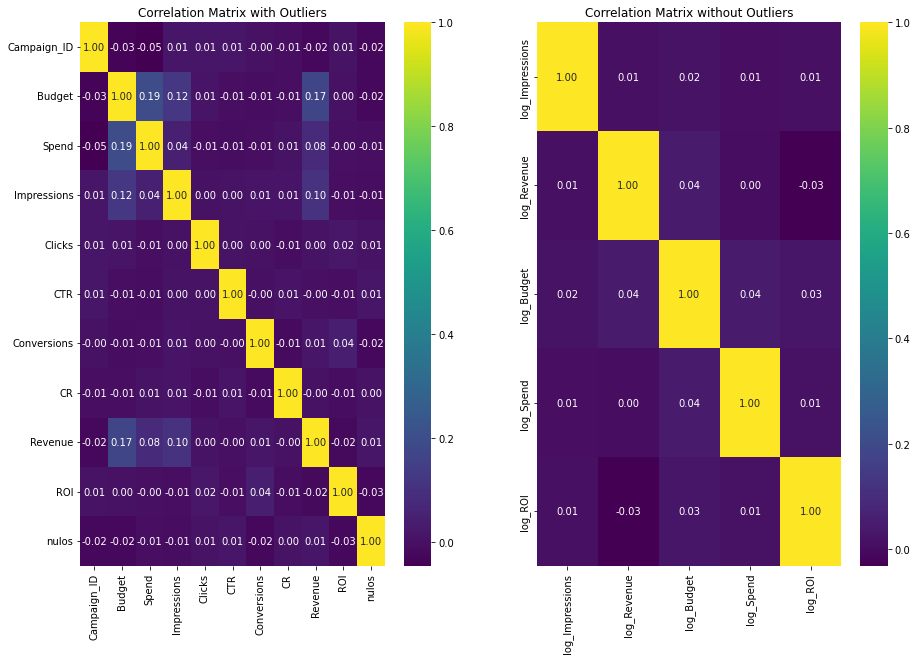

In [76]:
# Crear matrices de correlacion para analizar la relacion entre las variables numericas con los outliers y sin los outliers por separado 
correlation_outliers = df.select_dtypes(include=[np.number]).corr()
correlation_non_outliers = df_copy.select_dtypes(include=[np.number]).corr()

# Graficar las matrices de correlacion
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
sns.heatmap(correlation_outliers, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Matrix with Outliers')

plt.subplot(1, 2, 2)
correlation_log = df_copy.filter(like='log_').corr()
sns.heatmap(correlation_log, annot=True, fmt='.2f', cmap='viridis')
plt.title('Correlation Matrix without Outliers')
# Graficar la matriz de correlación solo con las columnas que tienen 'log_' en su nombre

plt.show()

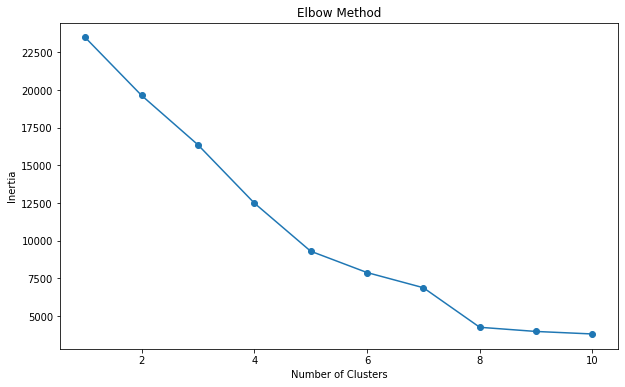

In [77]:
# Analisis de segmentacion para las variables numericas con los outliers
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler 

#Seleccionar variables numericas para el analisis de segmentacion
num_df = df [['Impressions','Budget','Spend','Revenue','ROI']].dropna()

# Estandarizar las variables numericas
scaler = StandardScaler()
numeric_scaled = scaler.fit_transform(num_df)

# Metodo del codo para determinar el numero de clusters
inertia = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(numeric_scaled)
    inertia.append(kmeans.inertia_)

# Graficar el metodo del codo
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), inertia, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()



Numero K= 4 o 5 

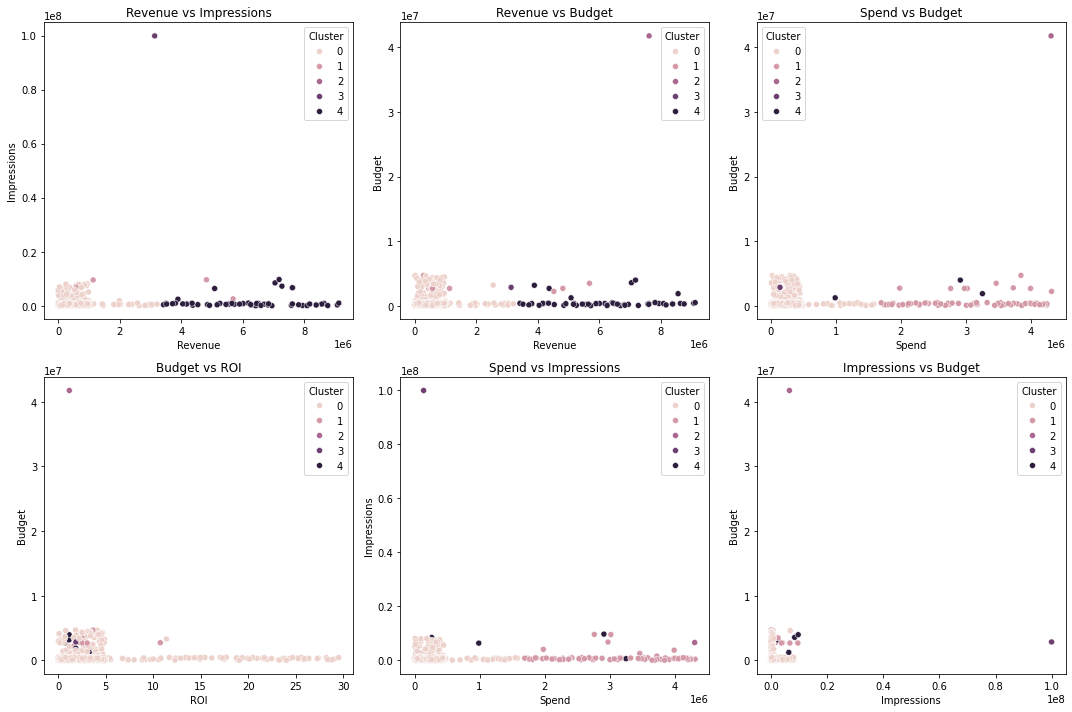

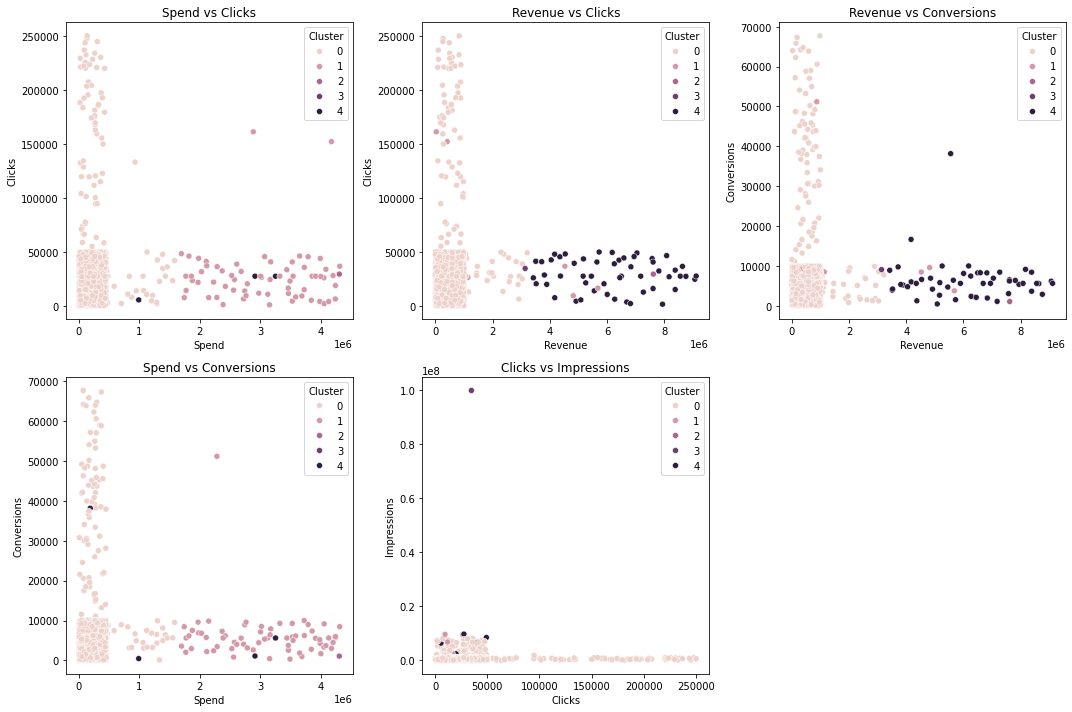

In [93]:
# Crear un DataFrame con las variables numericas estandarizadas
num_df = pd.DataFrame(numeric_scaled, columns=num_df.columns)

# Crear un modelo de KMeans con 3 clusters
kmeans = KMeans(n_clusters=5, random_state=42)

# Entrenar el modelo
kmeans.fit(num_df)

# Agregar las etiquetas de los clusters al DataFrame original
df['Cluster'] = kmeans.labels_

# Graficar la segmentacion de los clusters
plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='Revenue', y='Impressions', hue='Cluster')
plt.title('Revenue vs Impressions')

plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='Revenue', y='Budget', hue='Cluster')
plt.title('Revenue vs Budget')

plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='Spend', y='Budget', hue='Cluster')
plt.title('Spend vs Budget')

plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='ROI', y='Budget', hue='Cluster')
plt.title('Budget vs ROI')

plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='Spend', y='Impressions', hue='Cluster')
plt.title('Spend vs Impressions')

plt.subplot(2, 3, 6)
sns.scatterplot(data=df, x='Impressions', y='Budget', hue='Cluster')
plt.title('Impressions vs Budget')

plt.tight_layout()
plt.show()

plt.figure(figsize=(15, 10))
plt.subplot(2, 3, 1)
sns.scatterplot(data=df, x='Spend', y='Clicks', hue='Cluster')
plt.title('Spend vs Clicks')

plt.subplot(2, 3, 2)
sns.scatterplot(data=df, x='Revenue', y='Clicks', hue='Cluster')
plt.title('Revenue vs Clicks')

plt.subplot(2, 3, 3)
sns.scatterplot(data=df, x='Revenue', y='Conversions', hue='Cluster')
plt.title('Revenue vs Conversions')

plt.subplot(2, 3, 4)
sns.scatterplot(data=df, x='Spend', y='Conversions', hue='Cluster')
plt.title('Spend vs Conversions')

plt.subplot(2, 3, 5)
sns.scatterplot(data=df, x='Clicks', y='Impressions', hue='Cluster')
plt.title('Clicks vs Impressions')


plt.tight_layout()
plt.show()

### 6. Visualización de Datos

- Utiliza **Matplotlib** y **Seaborn** para crear visualizaciones estáticas.
- Utiliza **Plotly** para crear visualizaciones interactivas.
- Algunas visualizaciones sugeridas:
  - **Gráficos de barras**: Ingresos por canal, ROI por categoría de producto.
  - **Mapas geográficos**: Rendimiento por región.
  - **Series temporales**: Tendencias de impresiones y clics a lo largo del tiempo.

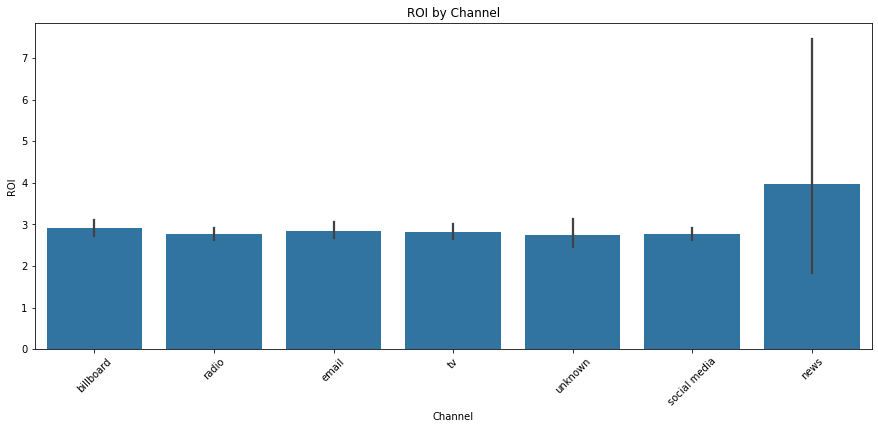

In [87]:
# Crear visualizaciones estaticas con Matplotlib y Seaborn

# Grafico de barras para analizar la distribucion de la variable x ='Channel' y y ='ROI'
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Channel', y='ROI')
plt.title('ROI by Channel')
plt.xticks(rotation=45)

plt.show()


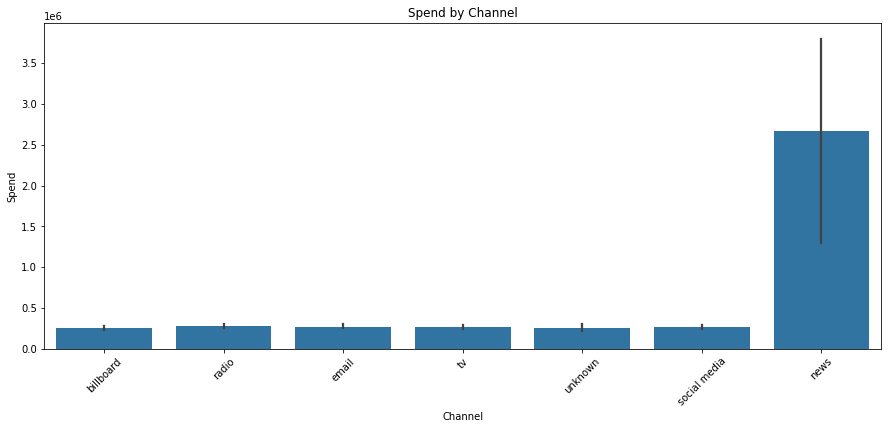

In [88]:
# Grafico de barras para analizar la distribucion de la variable x ='Channel' y y ='Spend'
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Channel', y='Spend')
plt.title('Spend by Channel')
plt.xticks(rotation=45)

plt.show()

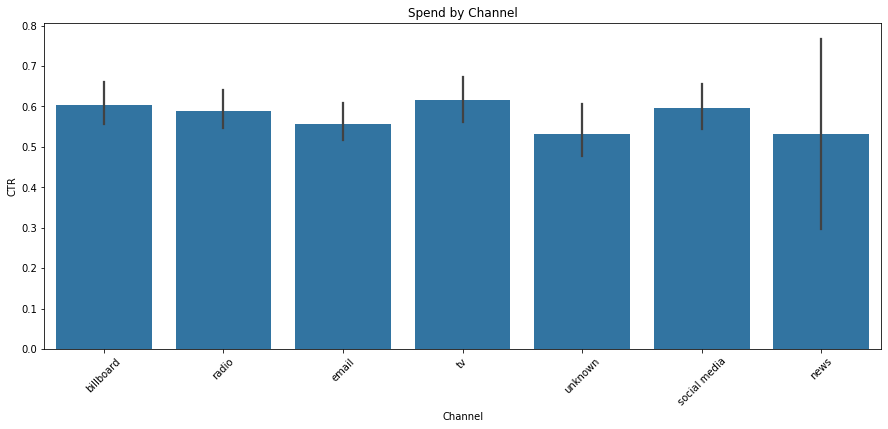

In [89]:
# Grafico de barras para analizar la distribucion de la variable x ='Channel' y y ='Spend'
plt.figure(figsize=(15, 6))
sns.barplot(data=df, x='Channel', y='CTR')
plt.title('Spend by Channel')
plt.xticks(rotation=45)

plt.show()

  - **Mapas geográficos**: Rendimiento por región.
  - **Series temporales**: Tendencias de impresiones y clics a lo largo del tiempo.

In [180]:
import plotly.graph_objects as go

# Load your DataFrame
df = pd.read_csv(r'mcp_1.csv')
df.head()

# Fill NaN values in 'Conversions' column with 0
df['Conversions'] = df['Conversions'].fillna(0)

# Drop rows with NaN values in the 'Region' column
df = df.dropna(subset=['Region'])

# Define the colors for different channels
colors = ["royalblue", "crimson", "lightseagreen", "orange", "lightgrey"]

# Add coordinates for the regions
coordinates = {
    'Kuala Lumpur': {'lat': 3.1390, 'lon': 101.6869},
    'Sarawak': {'lat': 1.5533, 'lon': 110.3592},
    'Penang': {'lat': 5.4164, 'lon': 100.3327},
    'Johor': {'lat': 1.4927, 'lon': 103.7414},
    'Malacca': {'lat': 2.1896, 'lon': 102.2501},
    'Sabah': {'lat': 5.9788, 'lon': 116.0753}
}

# Filter out rows with NaN values in the 'Region' column
df = df.dropna(subset=['Region'])

# Add latitude and longitude columns to the DataFrame
df['Lat'] = df['Region'].map(lambda x: coordinates[x]['lat'] if x in coordinates else None)
df['Lon'] = df['Region'].map(lambda x: coordinates[x]['lon'] if x in coordinates else None)

# Create the figure
fig = go.Figure()

# Loop through the unique channels and add a trace for each one to the figure with a bubble map of the regions colored by channel and sized by conversions 
for i, channel in enumerate(df['Channel'].unique()):
    df_channel = df.query('Channel == @channel')
    fig.add_trace(go.Scattergeo(
        lon = [coordinates[Region]['lon'] for Region in df_channel['Region']],
        lat = [coordinates[Region]['lat'] for Region in df_channel['Region']],
        text = df_channel['Region'] + '<br>Conversions: ' + df_channel['Conversions'].astype(str),
        marker = dict(
            size = df_channel['Conversions'] / 100,  # Adjust the size to be proportional
            line_color = 'rgb(40,40,40)',
            line_width = 0.2,
            sizemode = 'area'
        ),
        name = channel
    ))

# Update the layout
fig.update_layout(
    title_text='Geographic Bubble Map of the Regions colored by Channel and sized by Conversions',
    showlegend=True,
    geo=dict(
        scope='asia',
        landcolor='rgb(243, 243, 243)',
        projection_type='mercator',
        center=dict(lat=4.2105, lon=108.9758),  # Center the map around Malaysia
        lonaxis=dict(range=[400, 520]),  # Longitude range to make the map bigger
        lataxis=dict(range=[-8, 8])   # Latitude range to make the map bigger
    )
)

# Filter the DataFrame for a specific channel, e.g., 'Channel A'
df_channel_a = df.query('Channel == "Channel A"')

# Check if df_channel_a is not empty and if there are traces in the figure
if not df_channel_a.empty and len(fig.data) > 0:
    # Update the plot with markers and text for the filtered data
    fig.data[0].update(
        mode='markers+text',
        textposition='bottom center',
        text=df_channel_a['Conversions'].map('{:.0f}'.format).astype(str) + ' ' + df_channel_a['Region']
    )
    # Add a choropleth map for the filtered data
    fig.add_trace(go.Choropleth(
        locationmode='country names',
        locations=df_channel_a['Region'],
        z=df_channel_a['Conversions'],
        text=df_channel_a['Region'],
        colorscale=[[0, 'rgb(0, 0, 0)'], [1, 'rgb(0, 0, 0)']],
        autocolorscale=False,
        showscale=False,
        geo='geo2'
    ))


fig.show()

### Series temporales: Tendencias de impresiones y clics a lo largo del tiempo.

In [174]:
# Crear series temporales de tendencias de Impressions y Clicks a lo largo del año 2023
# Load your DataFrame
df = pd.read_csv(r'mcp_1.csv')

# Fill NaN values in 'Impressions' and 'Clicks' columns with 0
df['Impressions'] = df['Impressions'].fillna(0)
df['Clicks'] = df['Clicks'].fillna(0)

# Convert the 'Start_Date' and 'End_Date' columns to datetime
df['Start_Date'] = pd.to_datetime(df['Start_Date'], format='%d/%m/%Y', errors='coerce')
df['End_Date'] = pd.to_datetime(df['End_Date'], format='%d/%m/%Y', errors='coerce')

# Filter the DataFrame for the year 2023
df_2023 = df[(df['Start_Date'].dt.year == 2023) | (df['End_Date'].dt.year == 2023)]

# Group the DataFrame by 'Start_Date' and sum the 'Impressions' and 'Clicks' columns
df_grouped = df_2023.groupby('Start_Date')[['Impressions', 'Clicks']].sum().reset_index()

# Create the figure
fig = go.Figure()

# Add traces for 'Impressions' and 'Clicks' to the figure
fig.add_trace(go.Scatter(x=df_grouped['Start_Date'], y=df_grouped['Impressions'], mode='lines', name='Impressions'))
fig.add_trace(go.Scatter(x=df_grouped['Start_Date'], y=df_grouped['Clicks'], mode='lines', name='Clicks'))

# Update the layout
fig.update_layout(
    title='Trends of Impressions and Clicks in 2023',
    xaxis_title='Date',
    yaxis_title='Count',
    showlegend=True
)

fig.show()

### 7. Interpretación y Conclusiones

- Resume los hallazgos clave de tu análisis.
- Responde a preguntas como:
  - ¿Qué canales de marketing son más efectivos?
  - ¿Qué regiones generan más ingresos?
  - ¿Existe correlación entre el presupuesto y el ROI?
- Proporciona recomendaciones para futuras campañas.